## Obiettivi dell'analisi dati

La nostra idea è quella di analizzare i dati che ci sono stati forniti per capire che tipo di impatto sociale un licenziamento o un'assunzione possono avere per i soggetti di età superiore ai 40 anni. 

Come obiettivo secondario, useremo i dati per capire quali tipi di contratti sono i più diffusi in Lombardia e quali potrebbero esserlo in futuro

In ultimo andremo a studiare quali settori possono essere considerati in crescita secondo il rapporto tra contratti attivati e contratti cessati

La nostra analisi si concentrerà in un lasso di tempo 5 anni e dunque andremo a considerare tutti gli eventi di Attivazione o Terminazione di un contratto di lavoro dal 2017 al 2022.

### Importazione e lettura

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import datetime as datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_attivati = pd.read_csv("/Users/mac-josh/Desktop/DataScience/Esame_Laboratorio_1/RapportiAttivati.csv")
df_cessati = pd.read_csv("/Users/mac-josh/Desktop/DataScience/Esame_Laboratorio_1/RapportiCessati.csv")
#df_attivati = pd.read_csv("C:/Users/mirco/Desktop/Università_magistrale/2 year_II semester/Dasta science for Business/Laboratory/Rapporti_di_lavoro_attivati.csv")
#df_cessati = pd.read_csv("C:/Users/mirco/Desktop/Università_magistrale/2 year_II semester/Dasta science for Business/Laboratory/Rapporti_di_lavoro_cessati.csv")

Abbiamo optato per unire i dataset creando una colonna discriminante per idientificare la provenienza dei dati, in modo tale da poter operare meglio sui dati mantenendone però l'orgine:
- 1 = contratto attivato
- 0 = contratto cessato 



In [3]:
# Conversione delle date in formato Datetime - Italiano
df_attivati["DATA"] = pd.to_datetime(df_attivati["DATA"],dayfirst=True)
df_attivati["DATA"].sort_values()

7344048   1973-01-02
3406654   1974-06-11
298515    1976-10-01
2533702   1978-05-01
1335915   1978-07-10
             ...    
7011157   2021-12-09
2463822   2021-12-09
979636    2021-12-09
1561165   2021-12-09
5840160   2201-09-06
Name: DATA, Length: 9579794, dtype: datetime64[ns]

In [4]:
# Conversione delle date in formato Datetime - Italiano
df_cessati["DATA"] = pd.to_datetime(df_cessati["DATA"],dayfirst=True, errors="coerce")
df_cessati["DATA"].sort_values()

2943170   1988-01-05
740732    1988-12-07
1558111   1989-10-04
2082269   1990-06-04
2310574   1992-09-04
             ...    
59944     2021-12-09
2085739   2021-12-09
2447565   2021-12-09
3381986   2021-12-09
1269413          NaT
Name: DATA, Length: 3741394, dtype: datetime64[ns]

In [5]:
# Introduzione di una colonna aggiuntiva per distinguere le tipolgie di contratto
df_attivati["MODALITA"] = 1
df_cessati["MODALITA"] = 0
frames = [df_attivati, df_cessati]

# Concatenazione dei Dataset
df_globale = pd.concat(frames)

In [6]:
df_globale["DATA"].sort_values()

7344048   1973-01-02
3406654   1974-06-11
298515    1976-10-01
2533702   1978-05-01
1335915   1978-07-10
             ...    
1388873   2021-12-09
2874385   2021-12-09
256551    2021-12-09
5840160   2201-09-06
1269413          NaT
Name: DATA, Length: 13321188, dtype: datetime64[ns]

### Prima fase di studio

In questa sezione siamo andati ad analizzare i dati per capire la distribuzione di alcune caratteristiche dei dati, attraverso:

- Calcolo della media dell'età 

- Calcolo della distribuzione di genere

Entrambe le operazioni verrannno svolte tenendo in considerazione entrambe le modalità dei dataset (Contratti cessati e attivati)

In [7]:
## Calcolo dell'età media per i contratti attivati
print("Età media contratti attivati: {}".format(df_globale[df_globale["MODALITA"] == 1]["ETA"].mean()))

Età media contratti attivati: 35.301741457070996


In [8]:
## Calcolo dell'età media per i contratti cessati
print("Età media contratti cessati: {}".format(df_globale[df_globale["MODALITA"] == 0]["ETA"].mean()))

Età media contratti cessati: 38.11410345983342


In [9]:
## Calcolo dell'età media globale
print("Età media globale: {}".format(df_globale["ETA"].mean()))

Età media globale: 36.09162253396619


## Osservazione 

Notiamo che l'età media dei licenziamenti è leggermente superiore rispetto all'età media delle assunzioni.

Questo potrebbe essere dovuto alla quantità di dati presenti nel dataset dei cotratti cessati (in quantità minore rispetto alle informazioni dei contratti attivati); oppure, questa differenza potrebbe intuitivamente già rivelare un trend: in lombardia ci sono molti licenziamenti di soggetti con un età più elevata rispetto alle assunzioni

Text(0, 0.5, 'Genere')

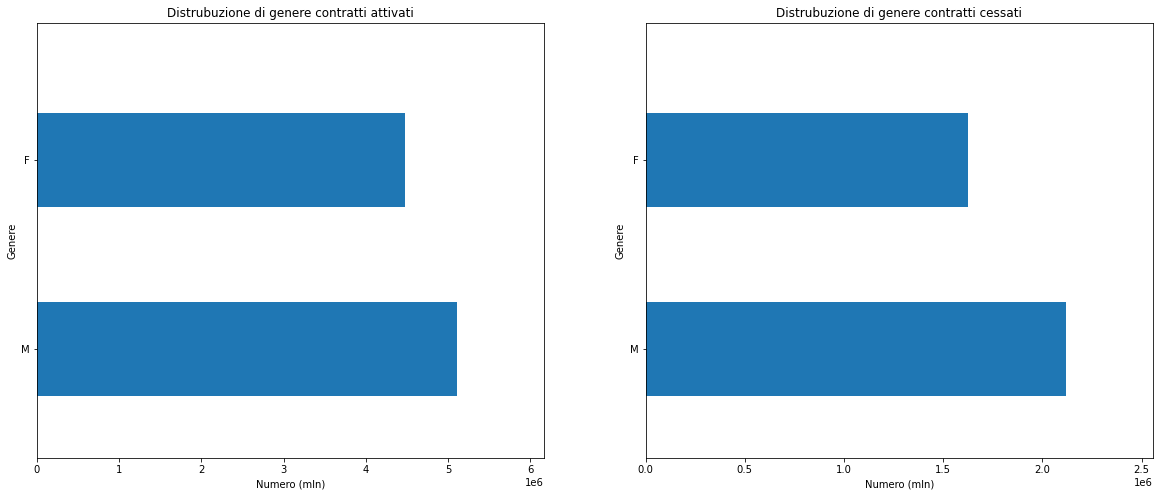

In [10]:
scale_factor = 1.15

fig = plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("Distrubuzione di genere contratti attivati")
df_globale[df_globale["MODALITA"] == 1]["GENERE"].value_counts().plot(kind="barh")
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.ylim(ymin * scale_factor, ymax * scale_factor)
plt.xlabel("Numero (mln)")
plt.ylabel("Genere")

plt.subplot(1,2,2)
plt.title("Distrubuzione di genere contratti cessati")
df_globale[df_globale["MODALITA"] == 0]["GENERE"].value_counts().plot(kind="barh")
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.ylim(ymin * scale_factor, ymax * scale_factor)
plt.xlabel("Numero (mln)")
plt.ylabel("Genere")

## Analisi valori (nulli e outliers)

- Abbiamo introdotto un grafico (per ogni dataset) per capire quanti e quali valori nulli sono presenti nel dataset

- La nostra scelta è stata quella di non considerare le righe che al loro interno presentano dei valori nulli in quanto rappresentano una percenutale ridotta del totale dei record; ma prima di eliminarle dal dataset però è necessario capire se le righe con valori nulli sono relativi ad una particolare classe di persone (in modo da evitare di introdurre bias all'interno delle analisi)

<AxesSubplot:>

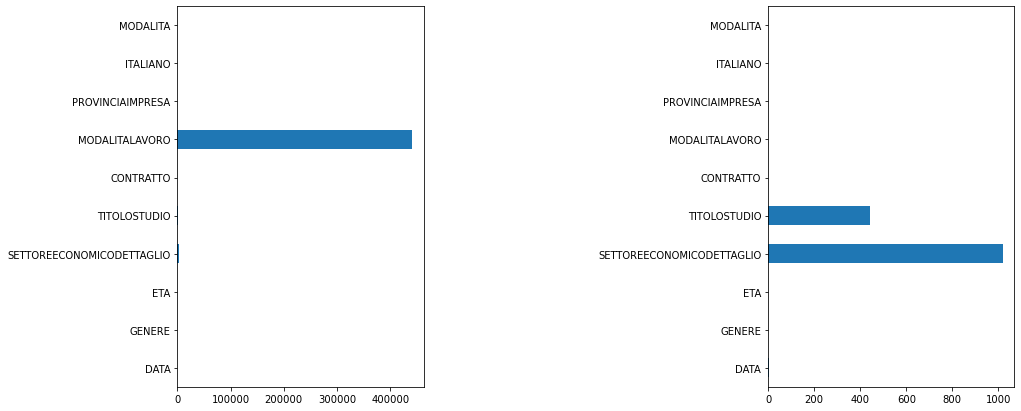

In [11]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
null_values_attivati = df_globale[df_globale["MODALITA"] == 1].isnull().sum()
null_values_attivati.plot.barh()

plt.subplot(1,3,3)
null_values_cessati = df_globale[df_globale["MODALITA"] == 0].isnull().sum()
null_values_cessati.plot.barh()

### Prime impressioni

- Dal primo grafico si può dedurre che più di 400k record del dataset non sono valorizzati per quanto riguarda la "Modalità di lavoro". Anche il "dettaglio del settore economico" risulta composto, seppure in maniera minima, da valori nulli per il dataset dei contratti attivati

- Per quanto riguarda invece il secondo sono poco più di un migliaio i dati, relativi al dettaglio del settore economico, che sono mancanti; anche per i titoli di studio abbiamo valori mancanti, ma in numero molto ridotto.

### Approfondimento

- Per confermare (o smentire) che gli unici valori nulli erano relativi solo a quelle due colonne abbiamo anche visualizzato i dati in maniera più grezza

- Capiamo che solo dal primo grafico (per via della scala) potevamo perderci alcune righe con valori nulli (titolo di studio).

- Il secondo invece è bastato per capire che i dati nulli fossero relativi solo al dettaglio del settore economico e al titolo di studio


In [12]:
print(null_values_attivati)
print("**********************************")
print(null_values_cessati)

DATA                              0
GENERE                            0
ETA                               0
SETTOREECONOMICODETTAGLIO      2888
TITOLOSTUDIO                    580
CONTRATTO                         0
MODALITALAVORO               440779
PROVINCIAIMPRESA                  0
ITALIANO                          0
MODALITA                          0
dtype: int64
**********************************
DATA                            1
GENERE                          0
ETA                             0
SETTOREECONOMICODETTAGLIO    1019
TITOLOSTUDIO                  440
CONTRATTO                       0
MODALITALAVORO                  0
PROVINCIAIMPRESA                0
ITALIANO                        0
MODALITA                        0
dtype: int64


 Per capire se eliminando le righe con valori nulli avremmo potuto introdurre un "bias" all'interno del dataset abbiamo eseguito le seguenti analisi:

__1:__ Verifica su genere 

__2:__ Verifica su eta

Per entrambe le modalita di contratto (attivato e cessato)

Text(0.5, 1.0, 'DIstribuzione del genere per i valori nulli')

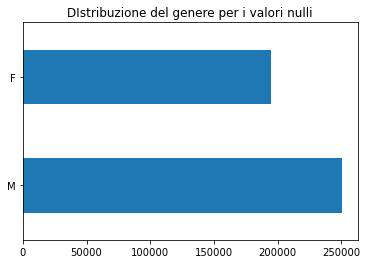

In [13]:
df_globale[df_globale.isna().any(axis=1)]["GENERE"].value_counts().plot.barh()
plt.title("DIstribuzione del genere per i valori nulli")

In [14]:
print("Eta media per i valori nulli {}".format(df_globale[df_globale.isna().any(axis=1)]["ETA"].mean()))

Eta media per i valori nulli 33.2042305705881


Infine abbiamo verificato l'integrità della feature 'ETA' per vedere se fossero stati inseriti casi limite che avrebbero potuto modificare le risposte del nostro lavoro. In particolare il campo che ci poteva fornire questo tipo di informazione era appunto l'età. 

- plot dell'età 
- studio dei valori
- rimozione degli outliers (prestando attenzione alla vita reale e andando a togliere solo quei valori che sono irreali)

<AxesSubplot:>

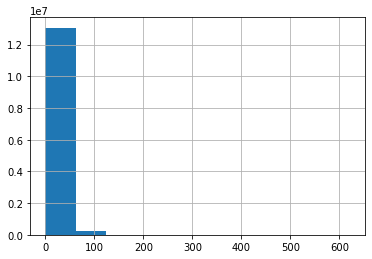

In [15]:
df_globale['ETA'].hist()

In [16]:
## Seleziona gli indici dei record con età maggiore di 99
indexNames = df_globale[ df_globale["ETA"] > 99 ].index

## Elimina i record in base agli indici
df_globale.drop(indexNames , inplace=True)

In [17]:
## Verifica che funzioni 
print("Età massima dopo la rimozione dei valori poco significativi: {}".format(df_globale["ETA"].max()))

Età massima dopo la rimozione dei valori poco significativi: 99


### Risultati analisi valori (nulli e outliers)

Eliminando le righe che presentano valori nulli (e considerando gli elementi più rilevanti) non si dovrebbero creare dei bias all'interno del dataset perchè:

- Per quanto riguarda il genere, la distribuzione è simile a quella globale (gli uomini sono un numero maggiore rispetto alle donne)

- Riguardo l'età media, vediamo che non si discosta troppo dalla media globale del dataset (38 anni)

- I valori (secondo noi) poco significativi sono stati rimossi (eta > 99 anni)

# Pulizia e trasformazione del dataset

Ci siamo accorti che all'interno del dataset c'erano delle incongruenze che andavano sistemate:

- rinominazione colonna "Italiano" che in realtà rispecchiava la "nazionalità" del soggetto __-->maggiore comprensione dei dati__
- conversione formato della data in DateTime __--> questo ci permette di sfruttare le operazioni offerte da datetime__
- per il nostro studio era di interesse solo l'anno del contratto attivato. Abbiamo dunque scelto di introdurre una nuova colonna "ANNO" per preservare l'intera data, qualora in un secondo momento dovesse esserci utile


In [18]:
## Rename della colonna ITALIANO
df_globale.rename(columns = {"ITALIANO":"NAZIONALITA"}, inplace = True)

In [19]:
## Rimozione dei valori nulli studiati in precedenza
df_globale.dropna(inplace=True)
df_globale

DATA GENERE  ETA  \
0       2020-05-09      F   60   
1       2019-07-12      M   43   
2       2013-06-05      F   20   
3       2010-03-12      F   28   
4       2021-04-06      F   49   
...            ...    ...  ...   
3741389 2018-11-05      M   19   
3741390 2017-04-09      M   67   
3741391 2015-05-08      M   59   
3741392 2016-10-10      M   26   
3741393 2018-10-09      M   45   

                                 SETTOREECONOMICODETTAGLIO  \
0        Attività di famiglie e convivenze come datori ...   
1        Gestioni di funicolari, ski-lift e seggiovie s...   
2        Fabbricazione di altre apparecchiature elettri...   
3                                                 Alberghi   
4                                       Rifugi di montagna   
...                                                    ...   
3741389  Fabbricazione di altri elementi in legno e di ...   
3741390  Altra istruzione secondaria di secondo grado d...   
3741391  Costruzione di edifici residenziali e non resi...   
3741392  Installazione di altre macchine ed apparecchia...   
3741393  Fabbricazione di strutture metalliche e parti ...   

                                              TITOLOSTUDIO  \
0                                  NESSUN TITOLO DI STUDIO   
1                                            LICENZA MEDIA   
2                                            LICENZA MEDIA   
3        DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CH...   
4                                            LICENZA MEDIA   
...                                                    ...   
3741389  TITOLO DI ISTRUZIONE SECONDARIA SUPERIORE (SCO...   
3741390               LAUREA - Vecchio o nuovo ordinamento   
3741391                            NESSUN TITOLO DI STUDIO   
3741392  DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CH...   
3741393                                      LICENZA MEDIA   

                                                 CONTRATTO MODALITALAVORO  \
0                                         LAVORO DOMESTICO    TEMPO PIENO   
1                               LAVORO A TEMPO DETERMINATO    TEMPO PIENO   
2        APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...    TEMPO PIENO   
3                 LAVORO INTERMITTENTE A TEMPO DETERMINATO   NON DEFINITO   
4                                     LAVORO INTERMITTENTE   NON DEFINITO   
...                                                    ...            ...   
3741389                         LAVORO A TEMPO DETERMINATO    TEMPO PIENO   
3741390                       LAVORO A TEMPO INDETERMINATO    TEMPO PIENO   
3741391                       LAVORO A TEMPO INDETERMINATO    TEMPO PIENO   
3741392                       LAVORO A TEMPO INDETERMINATO    TEMPO PIENO   
3741393                       LAVORO A TEMPO INDETERMINATO    TEMPO PIENO   

        PROVINCIAIMPRESA NAZIONALITA  MODALITA  
0                BERGAMO     UCRAINA         1  
1                BERGAMO      ITALIA         1  
2                BERGAMO      ITALIA         1  
3                BERGAMO      ITALIA         1  
4                BERGAMO      ITALIA         1  
...                  ...         ...       ...  
3741389          BRESCIA      ITALIA         0  
3741390          BRESCIA      ITALIA         0  
3741391          BERGAMO     MAROCCO         0  
3741392          BERGAMO      ITALIA         0  
3741393          BERGAMO      ITALIA         0  

[12875791 rows x 10 columns]

In [20]:
# Verifica di aver eliminato tutti i valori nulli
df_globale.isnull().sum(axis = 0)

DATA                         0
GENERE                       0
ETA                          0
SETTOREECONOMICODETTAGLIO    0
TITOLOSTUDIO                 0
CONTRATTO                    0
MODALITALAVORO               0
PROVINCIAIMPRESA             0
NAZIONALITA                  0
MODALITA                     0
dtype: int64

In [21]:
df_globale["ANNO"] = pd.DatetimeIndex(df_globale['DATA']).year

In [22]:
df_globale["MESE"] = pd.DatetimeIndex(df_globale['DATA']).month

## Estrazione dati relativi allo scopo dell'analisi
In questa sezione andiamo ad estrarre dal dataset solo i soggetti che:

- __Hanno età maggiore di 40 anni che hanno ricevuto un'attivazione del contratto dal 2017 al 2022__

- __Hanno età maggiore di 40 anni che hanno ricevuto una terminazione del contratto dal 2017 al 2022__


Dopo aver estratto solo i record inerenti al nostro studio, andremo a verificare nuovamente che i dati non presentino bias; andando a verificare la distribuzione di genere.

In [23]:
## Estrazione delle informazioni relative ai contratti attivati
df_attivati_over_40 = df_globale.loc[(df_globale["MODALITA"] == 1) & (df_globale["ETA"] > 39)]
df_attivati_over_40_after_2017 = df_attivati_over_40.loc[(df_attivati_over_40["ANNO"] > 2016)]

In [24]:
## Estrazione delle informazioni relative ai contratti terminati
df_cessati_over_40 = df_globale.loc[(df_globale["MODALITA"] == 0) & (df_globale["ETA"] > 39)]
df_cessati_over_40_after_2017 = df_cessati_over_40.loc[(df_cessati_over_40["ANNO"] > 2016)]

Text(0.5, 1.0, 'Distribuzione di genere per contratti terminati per gli over 40 dopo il 2017')

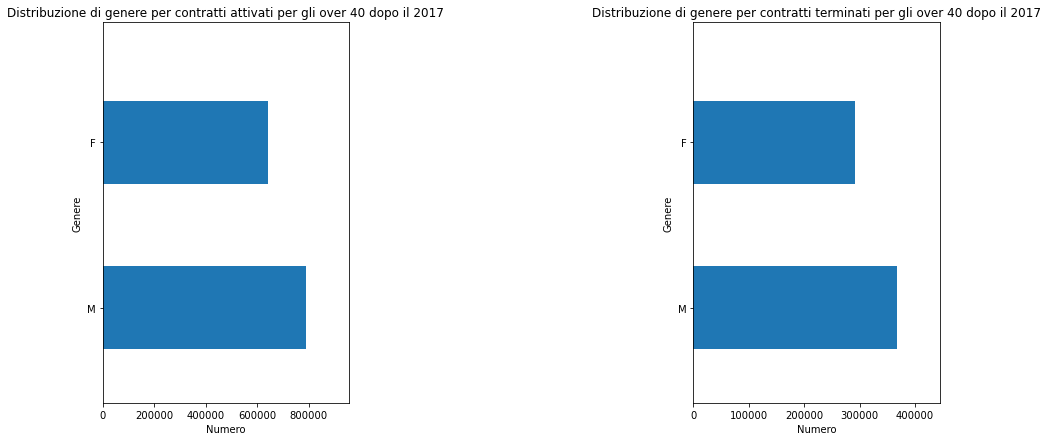

In [25]:
## Stampa i grafici relativi alla distribuzione del genere per entrambe le tipologie
scale_factor = 1.15
plt.figure(figsize=(15,7))

plt.subplot(1,3,1)
df_attivati_over_40_after_2017["GENERE"].value_counts().plot(kind='barh')
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.ylim(ymin * scale_factor, ymax * scale_factor)
plt.xlabel("Numero")
plt.ylabel("Genere")
plt.title("Distribuzione di genere per contratti attivati per gli over 40 dopo il 2017")

plt.subplot(1,3,3)
df_cessati_over_40_after_2017["GENERE"].value_counts().plot(kind='barh')
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.ylim(ymin * scale_factor, ymax * scale_factor)
plt.xlabel("Numero")
plt.ylabel("Genere")
plt.title("Distribuzione di genere per contratti terminati per gli over 40 dopo il 2017")

I dati hanno una distribuzione simile a quella del dataset iniziale. Questo ci suggerisce che anche riducendo il numero di record che stiamo considerando, i dati non presentano bias per quanto riguarda il genere.

### Analisi dei contratti

Per rendere lo studio più interessante abbiamo deciso di tenere solo i valori riguardanti gli ultimi 5 anni (2017-2021) per vedere come, in questi ultimi anni, l'andamento tra contratti attivati e terminati sia cambiato. Questa decisione arriva dal fatto che vogliamo vedere come si è evoluto l'ambiente lavorativo pre-durante e post pandemia.
Per questo motivo abbiamo deciso di suddividere i trend per anno per vederne l'andamento rispettando sempre la nostra idea iniziale di vedere quindi l'andamento dei contratti per gli over 40

### Trend per anno

In [26]:
df_attivati_over_40_after_2017.groupby("ANNO").count()

DATA  GENERE     ETA  SETTOREECONOMICODETTAGLIO  TITOLOSTUDIO  \
ANNO                                                                    
2017  305318  305318  305318                     305318        305318   
2018  327992  327992  327992                     327992        327992   
2019  324848  324848  324848                     324848        324848   
2020  245606  245606  245606                     245606        245606   
2021  228566  228566  228566                     228566        228566   

      CONTRATTO  MODALITALAVORO  PROVINCIAIMPRESA  NAZIONALITA  MODALITA  \
ANNO                                                                       
2017     305318          305318            305318       305318    305318   
2018     327992          327992            327992       327992    327992   
2019     324848          324848            324848       324848    324848   
2020     245606          245606            245606       245606    245606   
2021     228566          228566            228566       228566    228566   

        MESE  
ANNO          
2017  305318  
2018  327992  
2019  324848  
2020  245606  
2021  228566

In [27]:
## Raggruppamento per settore economico dettaglio
attivazione_dettaglio_group = df_attivati_over_40_after_2017.groupby("SETTOREECONOMICODETTAGLIO",as_index=False).count()
terminazione_dettaglio_group = df_cessati_over_40_after_2017.groupby("SETTOREECONOMICODETTAGLIO",as_index=False).count()

In [28]:
attivazione_dettaglio_group = attivazione_dettaglio_group.sort_values("ETA",ascending=False,ignore_index=True).iloc[0:10]

In [29]:
## Creazione di un nuovo dataframe con colonne solo quelle necessarie per la rappresentazione con grafici
df_settore_ecnomico = pd.DataFrame(columns=["SETTORE","NUMERO_ATTIVATI","NUMERO_TERMINATI"]) 

In [30]:
for index in range(len(attivazione_dettaglio_group)):
    for index2 in range(len(terminazione_dettaglio_group)):
        if(attivazione_dettaglio_group["SETTOREECONOMICODETTAGLIO"][index] == terminazione_dettaglio_group["SETTOREECONOMICODETTAGLIO"][index2]):
            df_settore_ecnomico = df_settore_ecnomico.append({"SETTORE":attivazione_dettaglio_group["SETTOREECONOMICODETTAGLIO"][index],"NUMERO_ATTIVATI":attivazione_dettaglio_group["ETA"][index],"NUMERO_TERMINATI":terminazione_dettaglio_group["ETA"][index2]},ignore_index=True)

In [31]:
df_settore_ecnomico

SETTORE NUMERO_ATTIVATI  \
0  Attività di famiglie e convivenze come datori ...           95460   
1  Attività di produzione cinematografica, di vid...           83509   
2                                           Alberghi           61409   
3    Pulizia generale (non specializzata) di edifici           55856   
4  Costruzione di edifici residenziali e non resi...           52098   
5                  Ristorazione con somministrazione           47850   
6  Istruzione secondaria di primo grado: scuole m...           40825   
7                       Trasporto di merci su strada           31616   
8         Altri servizi di supporto alle imprese nca           28874   
9  Servizi logistici relativi alla distribuzione ...           22663   

  NUMERO_TERMINATI  
0            81931  
1             1242  
2             8187  
3            31958  
4            31412  
5            19819  
6             4322  
7            22154  
8            16242  
9            14914

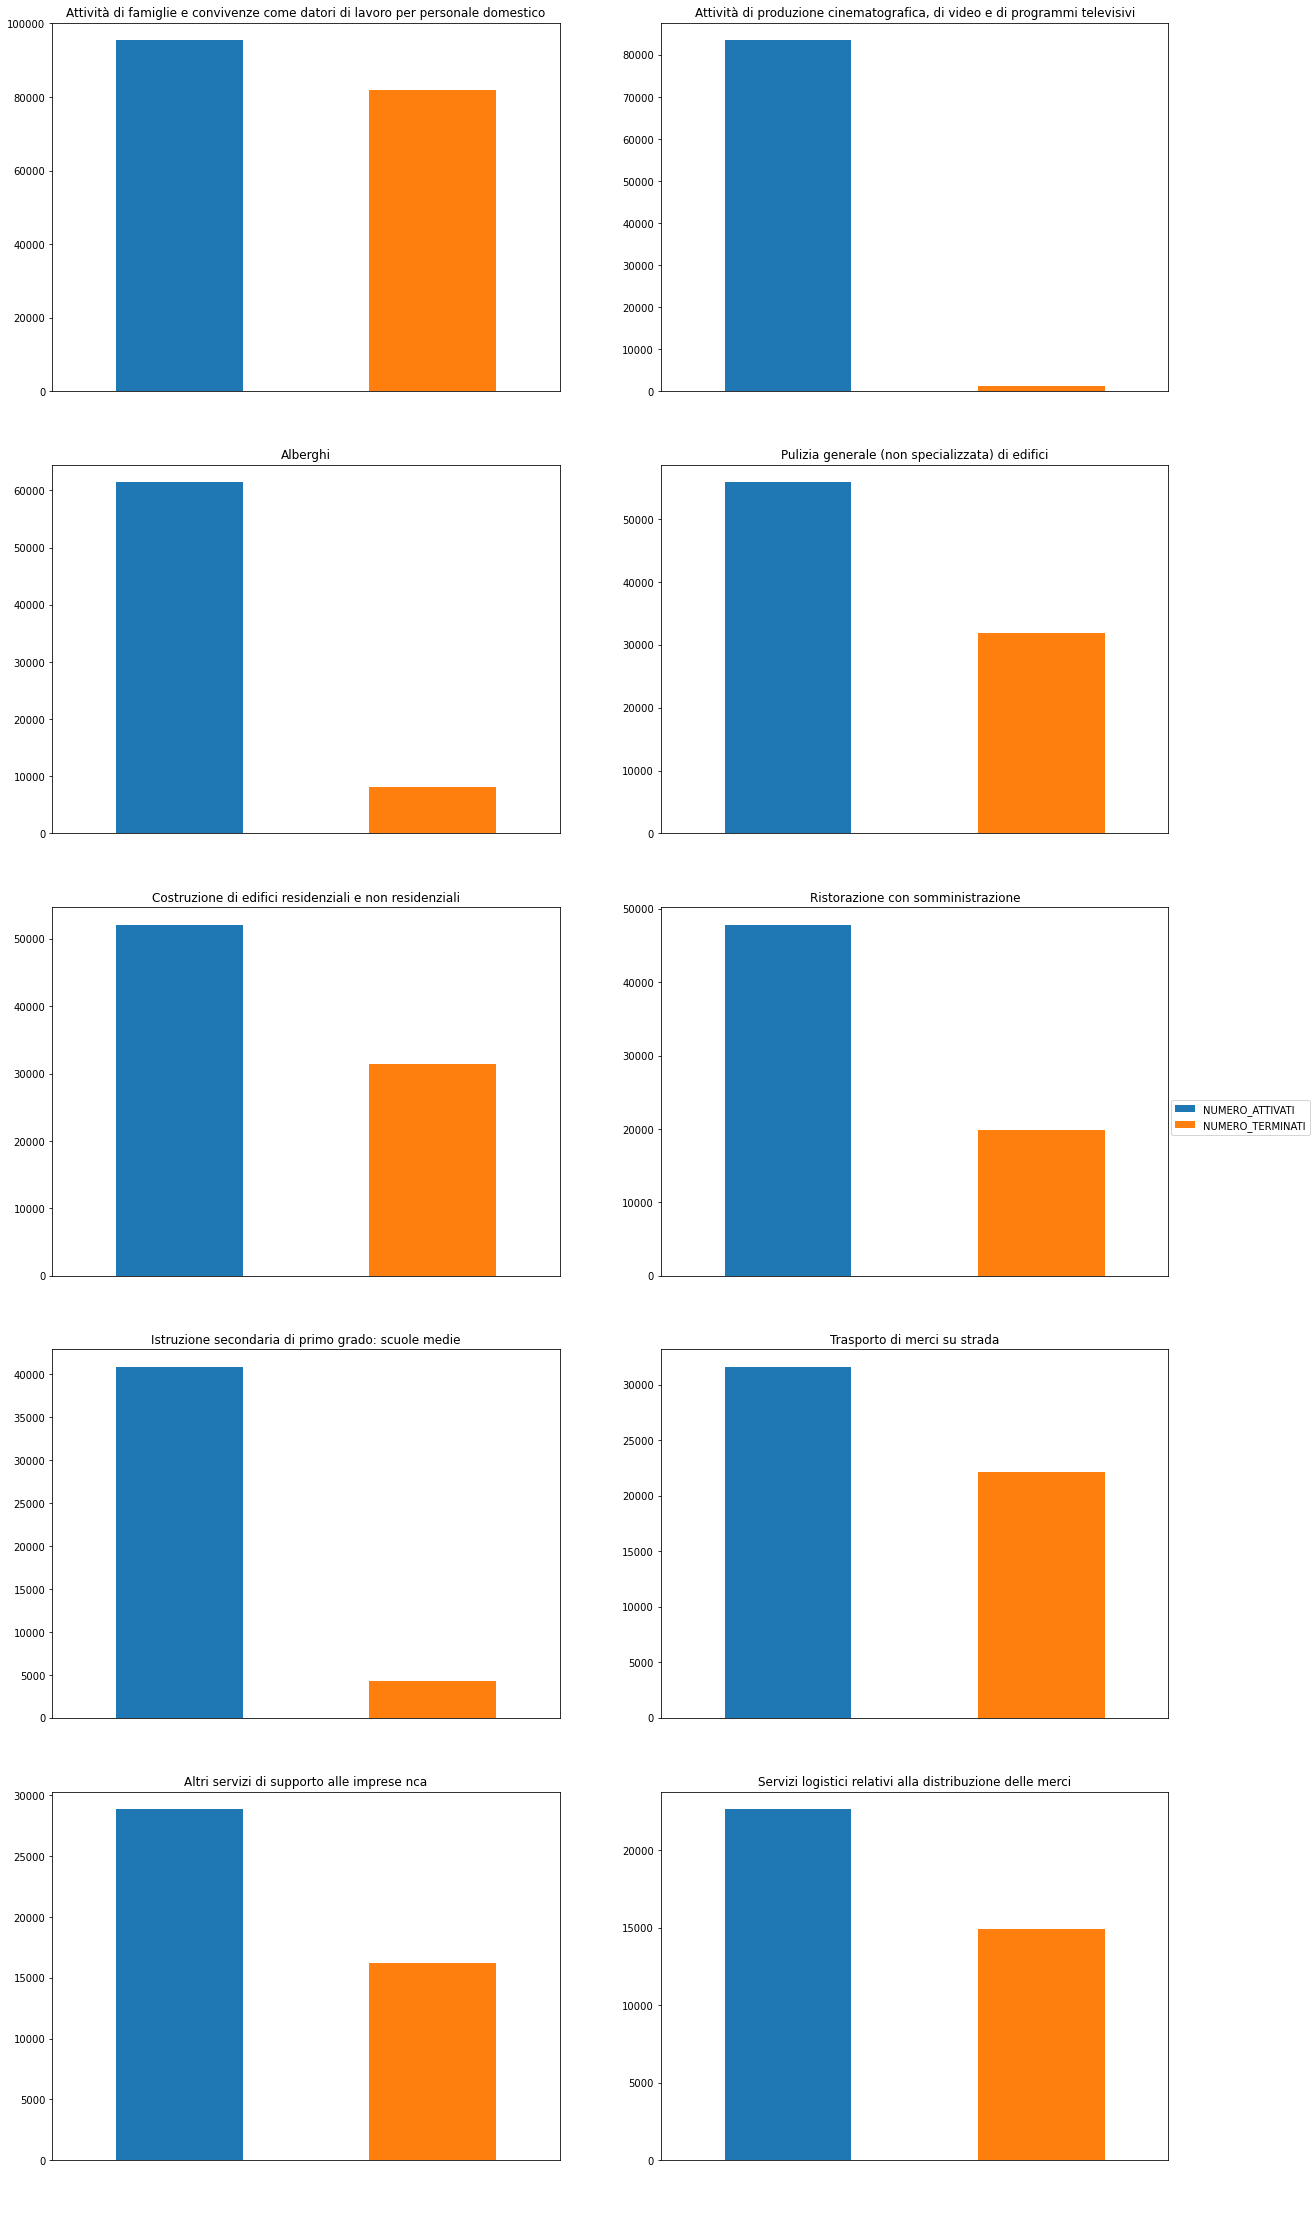

In [32]:
## Rappresentazione del dataframe sottoforma di istogrammi
df_settore_ecnomico = df_settore_ecnomico.set_index('SETTORE')
fig = plt.figure(figsize=(20,80))
for i, (name, row) in enumerate(df_settore_ecnomico.iterrows()):
    ax = plt.subplot(10,2, i+1)
    ax.set_title(row.name)
    ax.get_xaxis().set_visible(False)
    df_settore_ecnomico.iloc[i].plot.bar(color=['C0', 'C1'])
fig.legend(ax.bar([0,0],[0,0], color=['C0','C1']),['NUMERO_ATTIVATI','NUMERO_TERMINATI'], loc=5)

plt.show()

Statisticamente si può dedurre che, globalmente, tutti i settori econoci hanno avuto un buon indice di crescita

Per rendere più efficace lo studio però abbiamo deciso di raggruppare i settori economici in X categorie in modo tale da capire in maniera migliore il trend futuro
    


In [33]:
df_attivati_over_40_after_2017.to_csv('df_parte1.csv', index=False)

# Join con Dataset Ateco

##### Questa sezione permetterà un raggruppamento secondo codici di sezione ateco per quanto riguarda il settore di lavoro
L'idea di questo join nasce dal fatto che avendo un dataset molto popolato, abbiamo bisogno di raggruppare assieme tutte quelle categorie lavorative che rientrano nello stesso settore. Per farlo appunto abbiamo deciso di effettuare un merge con il dataset Ateco che contiene già la divisione per settori.

**Questa operazione ci permetterà di ridurre il numero di classi totali raggruppando però attività simili nello stesso settore**


In [36]:
# Permette di importare e pulire il Dataset dei codici ateco
def Import_And_Clean_Ateco():
    
    # Lettura Dataset contenente i codici ateco
    #df_ateco = pd.read_csv("C:/Users/mirco/Desktop/Università_magistrale/2 year_II semester/Dasta science for Business/Laboratory/Codici_Ateco.csv")
    df_ateco = pd.read_csv("/Users/mac-josh/Desktop/DataScience/Esame_Laboratorio_1/Codici_Ateco.csv")
    
    # Rimozione del codice ateco dalla descrizione Ateco
    for Index in range(len(df_ateco["Codice_ateco"])):
        df_ateco["Descrizione_ateco"][Index] = df_ateco["Descrizione_ateco"][Index][len(df_ateco["Codice_ateco"][Index])+2:len(df_ateco["Descrizione_ateco"][Index])]
    
        # Rimozione dello spazio iniziale
        df_ateco["Descrizione_ateco"][Index] = df_ateco["Descrizione_ateco"][Index].strip()
    
    # Drop della colonna id perchè non serve
    df_ateco = df_ateco.drop("_id",axis=1)
    
    # Rinominazione della colonna della descrizione per fare successivamente il join
    df_ateco.rename(columns = {"Descrizione_ateco":"SETTOREECONOMICODETTAGLIO"}, inplace = True)
    
    # Lower case di tutta la colonna del settore economico per fare la join con gli altri dataset
    df_ateco["SETTOREECONOMICODETTAGLIO"] = df_ateco["SETTOREECONOMICODETTAGLIO"].str.lower()
    
    # Rimozione dei codici duplicati (dataset corrotto?)
    df_ateco.drop_duplicates(subset="SETTOREECONOMICODETTAGLIO",keep="first",inplace=True)
    
    return df_ateco    

In [37]:
df_ateco = Import_And_Clean_Ateco()

In [38]:
# Questa funzione permette di eseguire la LeftJoin tra i dataset Over40After2017 con 
# il dataset dei codici ateco. Secondo step è quello di estrapolare MacroCategoria e 
# Hyper Categoria dai codici ateco, questo ci permette un raggruppamento migliore
def Join_Ateco_DF(df):
    
    # Lower case di tutta la colonna del settore economico per fare la join con l'altro dataset
    df["SETTOREECONOMICODETTAGLIO"] = df["SETTOREECONOMICODETTAGLIO"].str.lower() 
    
    # Merge dei dataset per colonna settore economico dettaglio
    df = df.merge(df_ateco,on="SETTOREECONOMICODETTAGLIO",how="left")
    
    # Controllo sui valori nulli (non tutti i settori economici hanno un codice ateco)
    ## Ne rimangono fuori circa 35mila --> soluzione --> Dare un codice speciale a quelli che non l'hanno
    ### Introduzione di un codice speciale per i valori che hanno dati mancanti
    df["Codice_ateco"].fillna("99",inplace=True)
    
    # Creazione della nuova colonna che introduce la macro categoria
    df["MACRO_CATEGORIA_ATECO"] = ""
    
    # Estrapola la macro categoria Ateco (Series) (con una lambda perchè non ho 51 secoli)
    macro_ateco = df.apply(lambda df: df['Codice_ateco'][:2], axis=1)
    
    # Setta i valori della serie nella colonna
    df["MACRO_CATEGORIA_ATECO"] = macro_ateco
    
    # Creazione della nuova colonna che introduce la Hyper categoria
    df["HYPER_CATEGORIA_ATECO"] = ""
    
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "01", "HYPER_CATEGORIA_ATECO"] = "A"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "02", "HYPER_CATEGORIA_ATECO"] = "A"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "03", "HYPER_CATEGORIA_ATECO"] = "A"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "05", "HYPER_CATEGORIA_ATECO"] = "B"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "06", "HYPER_CATEGORIA_ATECO"] = "B"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "07", "HYPER_CATEGORIA_ATECO"] = "B"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "08", "HYPER_CATEGORIA_ATECO"] = "B"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "09", "HYPER_CATEGORIA_ATECO"] = "B"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "10", "HYPER_CATEGORIA_ATECO"] = "C"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "11", "HYPER_CATEGORIA_ATECO"] = "C"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "12", "HYPER_CATEGORIA_ATECO"] = "C"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "13", "HYPER_CATEGORIA_ATECO"] = "C"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "14", "HYPER_CATEGORIA_ATECO"] = "C"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "15", "HYPER_CATEGORIA_ATECO"] = "C"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "16", "HYPER_CATEGORIA_ATECO"] = "C"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "17", "HYPER_CATEGORIA_ATECO"] = "C"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "18", "HYPER_CATEGORIA_ATECO"] = "C"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "19", "HYPER_CATEGORIA_ATECO"] = "C"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "20", "HYPER_CATEGORIA_ATECO"] = "C"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "21", "HYPER_CATEGORIA_ATECO"] = "C"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "22", "HYPER_CATEGORIA_ATECO"] = "C" 
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "23", "HYPER_CATEGORIA_ATECO"] = "C"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "24", "HYPER_CATEGORIA_ATECO"] = "C"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "25", "HYPER_CATEGORIA_ATECO"] = "C"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "26", "HYPER_CATEGORIA_ATECO"] = "C"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "27", "HYPER_CATEGORIA_ATECO"] = "C"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "28", "HYPER_CATEGORIA_ATECO"] = "C" 
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "29", "HYPER_CATEGORIA_ATECO"] = "C" 
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "30", "HYPER_CATEGORIA_ATECO"] = "C"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "31", "HYPER_CATEGORIA_ATECO"] = "C"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "32", "HYPER_CATEGORIA_ATECO"] = "C"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "33", "HYPER_CATEGORIA_ATECO"] = "C"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "35", "HYPER_CATEGORIA_ATECO"] = "D"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "36", "HYPER_CATEGORIA_ATECO"] = "E"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "37", "HYPER_CATEGORIA_ATECO"] = "E"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "38", "HYPER_CATEGORIA_ATECO"] = "E"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "39", "HYPER_CATEGORIA_ATECO"] = "E"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "41", "HYPER_CATEGORIA_ATECO"] = "F"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "42", "HYPER_CATEGORIA_ATECO"] = "F"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "43", "HYPER_CATEGORIA_ATECO"] = "F"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "45", "HYPER_CATEGORIA_ATECO"] = "G"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "46", "HYPER_CATEGORIA_ATECO"] = "G"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "47", "HYPER_CATEGORIA_ATECO"] = "G"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "49", "HYPER_CATEGORIA_ATECO"] = "H"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "50", "HYPER_CATEGORIA_ATECO"] = "H"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "51", "HYPER_CATEGORIA_ATECO"] = "H"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "52", "HYPER_CATEGORIA_ATECO"] = "H"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "53", "HYPER_CATEGORIA_ATECO"] = "H"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "55", "HYPER_CATEGORIA_ATECO"] = "I"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "56", "HYPER_CATEGORIA_ATECO"] = "I"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "58", "HYPER_CATEGORIA_ATECO"] = "J"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "59", "HYPER_CATEGORIA_ATECO"] = "J"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "60", "HYPER_CATEGORIA_ATECO"] = "J"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "61", "HYPER_CATEGORIA_ATECO"] = "J"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "62", "HYPER_CATEGORIA_ATECO"] = "J"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "63", "HYPER_CATEGORIA_ATECO"] = "J"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "64", "HYPER_CATEGORIA_ATECO"] = "K"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "65", "HYPER_CATEGORIA_ATECO"] = "K" 
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "66", "HYPER_CATEGORIA_ATECO"] = "K"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "68", "HYPER_CATEGORIA_ATECO"] = "L"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "69", "HYPER_CATEGORIA_ATECO"] = "M"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "70", "HYPER_CATEGORIA_ATECO"] = "M"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "71", "HYPER_CATEGORIA_ATECO"] = "M"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "72", "HYPER_CATEGORIA_ATECO"] = "M"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "73", "HYPER_CATEGORIA_ATECO"] = "M"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "74", "HYPER_CATEGORIA_ATECO"] = "M" 
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "75", "HYPER_CATEGORIA_ATECO"] = "M"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "77", "HYPER_CATEGORIA_ATECO"] = "N"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "78", "HYPER_CATEGORIA_ATECO"] = "N"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "79", "HYPER_CATEGORIA_ATECO"] = "N"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "80", "HYPER_CATEGORIA_ATECO"] = "N"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "81", "HYPER_CATEGORIA_ATECO"] = "N"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "82", "HYPER_CATEGORIA_ATECO"] = "N"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "84", "HYPER_CATEGORIA_ATECO"] = "O"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "85", "HYPER_CATEGORIA_ATECO"] = "P"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "86", "HYPER_CATEGORIA_ATECO"] = "Q"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "87", "HYPER_CATEGORIA_ATECO"] = "Q"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "88", "HYPER_CATEGORIA_ATECO"] = "Q"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "90", "HYPER_CATEGORIA_ATECO"] = "R"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "91", "HYPER_CATEGORIA_ATECO"] = "R"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "92", "HYPER_CATEGORIA_ATECO"] = "R"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "93", "HYPER_CATEGORIA_ATECO"] = "R"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "94", "HYPER_CATEGORIA_ATECO"] = "S"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "95", "HYPER_CATEGORIA_ATECO"] = "S"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "96", "HYPER_CATEGORIA_ATECO"] = "S"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "97", "HYPER_CATEGORIA_ATECO"] = "T"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "98", "HYPER_CATEGORIA_ATECO"] = "T"
    df.loc[df["MACRO_CATEGORIA_ATECO"] == "99", "HYPER_CATEGORIA_ATECO"] = "U"
    
    return df

In [39]:
# Join con codici Ateco - Attivati -
df_attivati_over_40_after_2017 = Join_Ateco_DF(df_attivati_over_40_after_2017)

In [40]:
# Join con codici Ateco - Cessati - 
df_cessati_over_40_after_2017 = Join_Ateco_DF(df_cessati_over_40_after_2017)

In [41]:
df_attivati_over_40_after_2017["MODALITA"] = 1
df_cessati_over_40_after_2017["MODALITA"] = 0
frames = [df_attivati_over_40_after_2017, df_cessati_over_40_after_2017]

df_prova = pd.concat(frames)
df_prova

DATA GENERE  ETA  \
0      2020-05-09      F   60   
1      2019-07-12      M   43   
2      2021-04-06      F   49   
3      2018-03-04      F   56   
4      2020-06-03      M   55   
...           ...    ...  ...   
659591 2019-07-11      M   52   
659592 2018-11-12      M   61   
659593 2017-11-03      M   54   
659594 2017-04-09      M   67   
659595 2018-10-09      M   45   

                                SETTOREECONOMICODETTAGLIO  \
0       attività di famiglie e convivenze come datori ...   
1       gestioni di funicolari, ski-lift e seggiovie s...   
2                                      rifugi di montagna   
3       confezioni di abbigliamento sportivo o di altr...   
4                bar e altri esercizi simili senza cucina   
...                                                   ...   
659591                                        demolizione   
659592  posa in opera di infissi, arredi, controsoffit...   
659593                                       supermercati   
659594  altra istruzione secondaria di secondo grado d...   
659595  fabbricazione di strutture metalliche e parti ...   

                                             TITOLOSTUDIO  \
0                                 NESSUN TITOLO DI STUDIO   
1                                           LICENZA MEDIA   
2                                           LICENZA MEDIA   
3                                           LICENZA MEDIA   
4                                           LICENZA MEDIA   
...                                                   ...   
659591                            NESSUN TITOLO DI STUDIO   
659592  DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CH...   
659593  DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CH...   
659594               LAUREA - Vecchio o nuovo ordinamento   
659595                                      LICENZA MEDIA   

                           CONTRATTO              MODALITALAVORO  \
0                   LAVORO DOMESTICO                 TEMPO PIENO   
1         LAVORO A TEMPO DETERMINATO                 TEMPO PIENO   
2               LAVORO INTERMITTENTE                NON DEFINITO   
3         LAVORO A TEMPO DETERMINATO  TEMPO PARZIALE ORIZZONTALE   
4         LAVORO A TEMPO DETERMINATO  TEMPO PARZIALE ORIZZONTALE   
...                              ...                         ...   
659591  LAVORO A TEMPO INDETERMINATO                 TEMPO PIENO   
659592  LAVORO A TEMPO INDETERMINATO  TEMPO PARZIALE ORIZZONTALE   
659593    LAVORO A TEMPO DETERMINATO  TEMPO PARZIALE ORIZZONTALE   
659594  LAVORO A TEMPO INDETERMINATO                 TEMPO PIENO   
659595  LAVORO A TEMPO INDETERMINATO                 TEMPO PIENO   

       PROVINCIAIMPRESA NAZIONALITA  MODALITA  ANNO  MESE Codice_ateco  \
0               BERGAMO     UCRAINA         1  2020     5           97   
1               BERGAMO      ITALIA         1  2019     7           99   
2               BERGAMO      ITALIA         1  2021     4      55.20.3   
3               BERGAMO      ITALIA         1  2018     3     14.19.29   
4               BERGAMO      ITALIA         1  2020     6         56.3   
...                 ...         ...       ...   ...   ...          ...   
659591  MONZA E BRIANZA      EGITTO         0  2019     7        43.11   
659592  MONZA E BRIANZA      ITALIA         0  2018    11      43.32.0   
659593  MONZA E BRIANZA      ITALIA         0  2017    11      47.11.2   
659594          BRESCIA      ITALIA         0  2017     4     85.32.09   
659595          BERGAMO      ITALIA         0  2018    10      25.11.0   

       MACRO_CATEGORIA_ATECO HYPER_CATEGORIA_ATECO  
0                         97                     T  
1                         99                     U  
2                         55                     I  
3                         14                     C  
4                         56                     I  
...                      ...                   ...  
659591                    43                     F  
659592              

# Grouping titolo di studio

##### Questo tipo di raggruppamento ci servirà per capire come correlare assunzioni/terminazioni di contratto 
Noi supponiamo che sia meno probabile che le persone con un titolo di studio più alto siano meno soggette a licenziamenti.

Abbiamo quindi deciso di raggruppare i vari titoli di studio in tre fasce per poter avere una classificazione più omogena che rispecchiasse comunque il grado di istruzione ricevuto

In [42]:
# Funzione che permette di raggruppare i titoli di studio in 4 livelli
def Grouping_Titolo_Studio(df):

    # Creazione della nuova colonna che introduce il livello di studio
    df["LIVELLO_STUDIO"] = ""
    
    df.loc[df["TITOLOSTUDIO"] == "NESSUN TITOLO DI STUDIO", "GRUPPO_TITOLO_STUDIO"] = "Basso"
    df.loc[df["TITOLOSTUDIO"] == "LICENZA ELEMENTARE", "GRUPPO_TITOLO_STUDIO"] = "Basso"
    df.loc[df["TITOLOSTUDIO"] == "LICENZA MEDIA", "GRUPPO_TITOLO_STUDIO"] = "Basso"
        
    df.loc[df["TITOLOSTUDIO"] == "DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CHE PERMETTE L'ACCESSO ALL'UNIVERSITA", "GRUPPO_TITOLO_STUDIO"] = "Medio"
    df.loc[df["TITOLOSTUDIO"] == "TITOLO DI ISTRUZIONE SECONDARIA SUPERIORE (SCOLASTICA ED EXTRA-SCOLASTICA) CHE NON PERMETTE L'ACCESSO ALL'UNIVERSITÀ ()", "GRUPPO_TITOLO_STUDIO"] = "Medio"
    df.loc[df["TITOLOSTUDIO"] == "DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CHE PERMETTE L'ACCESSO ALL'UNIVERSITA", "GRUPPO_TITOLO_STUDIO"] = "Medio"
    
    
    df.loc[df["TITOLOSTUDIO"] == "DIPLOMA DI SPECIALIZZAZIONE", "GRUPPO_TITOLO_STUDIO"] = "Alto"
    df.loc[df["TITOLOSTUDIO"] == "DIPLOMA TERZIARIO EXTRA-UNIVERSITARIO", "GRUPPO_TITOLO_STUDIO"] = "Alto"
    df.loc[df["TITOLOSTUDIO"] == "DIPLOMA UNIVERSITARIO", "GRUPPO_TITOLO_STUDIO"] = "Alto"
    df.loc[df["TITOLOSTUDIO"] == "LAUREA - Vecchio o nuovo ordinamento", "GRUPPO_TITOLO_STUDIO"] = "Alto"
    df.loc[df["TITOLOSTUDIO"] == "MASTER UNIVERSITARIO DI PRIMO LIVELLO", "GRUPPO_TITOLO_STUDIO"] = "Alto"
    df.loc[df["TITOLOSTUDIO"] == "TITOLO DI DOTTORE DI RICERCA", "GRUPPO_TITOLO_STUDIO"] = "Alto"
    df.loc[df["TITOLOSTUDIO"] == "TITOLO DI STUDIO POST-LAUREA", "GRUPPO_TITOLO_STUDIO"] = "Alto"
    
    return df
    

In [43]:
# Applica il raggruppamento ad entrambi i dataset
df_attivati_over_40_after_2017 = Grouping_Titolo_Studio(df_attivati_over_40_after_2017)
df_cessati_over_40_after_2017 = Grouping_Titolo_Studio(df_cessati_over_40_after_2017)

In [44]:
# Verifica che tutti i gruppi siano valorizzati -> non lo sono, non capisco perche
df_attivati_over_40_after_2017[df_attivati_over_40_after_2017["GRUPPO_TITOLO_STUDIO"].isna()].groupby("TITOLOSTUDIO").count()

DATA  GENERE     ETA  \
TITOLOSTUDIO                                                                 
DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE...  318338  318338  318338   

                                                    SETTOREECONOMICODETTAGLIO  \
TITOLOSTUDIO                                                                    
DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE...                     318338   

                                                    CONTRATTO  MODALITALAVORO  \
TITOLOSTUDIO                                                                    
DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE...     318338          318338   

                                                    PROVINCIAIMPRESA  \
TITOLOSTUDIO                                                           
DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE...            318338   

                                                    NAZIONALITA  MODALITA  \
TITOLOSTUDIO                                                                
DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE...       318338    318338   

                                                      ANNO    MESE  \
TITOLOSTUDIO                                                         
DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE...  318338  318338   

                                                    Codice_ateco  \
TITOLOSTUDIO                                                       
DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE...        318338   

                                                    MACRO_CATEGORIA_ATECO  \
TITOLOSTUDIO                                                                
DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE...                 318338   

                                                    HYPER_CATEGORIA_ATECO  \
TITOLOSTUDIO                                                                
DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE...                 318338   

                                                    LIVELLO_STUDIO  \
TITOLOSTUDIO                                                         
DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE...          318338   

                                                    GRUPPO_TITOLO_STUDIO  
TITOLOSTUDIO                                                              
DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE...                     0

In [45]:
# Verifica che tutti i gruppi siano valorizzati -> non lo sono, non capisco perche
df_cessati_over_40_after_2017[df_cessati_over_40_after_2017["GRUPPO_TITOLO_STUDIO"].isna()].groupby("TITOLOSTUDIO").count()

DATA  GENERE     ETA  \
TITOLOSTUDIO                                                                 
DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE...  129414  129414  129414   

                                                    SETTOREECONOMICODETTAGLIO  \
TITOLOSTUDIO                                                                    
DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE...                     129414   

                                                    CONTRATTO  MODALITALAVORO  \
TITOLOSTUDIO                                                                    
DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE...     129414          129414   

                                                    PROVINCIAIMPRESA  \
TITOLOSTUDIO                                                           
DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE...            129414   

                                                    NAZIONALITA  MODALITA  \
TITOLOSTUDIO                                                                
DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE...       129414    129414   

                                                      ANNO    MESE  \
TITOLOSTUDIO                                                         
DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE...  129414  129414   

                                                    Codice_ateco  \
TITOLOSTUDIO                                                       
DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE...        129414   

                                                    MACRO_CATEGORIA_ATECO  \
TITOLOSTUDIO                                                                
DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE...                 129414   

                                                    HYPER_CATEGORIA_ATECO  \
TITOLOSTUDIO                                                                
DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE...                 129414   

                                                    LIVELLO_STUDIO  \
TITOLOSTUDIO                                                         
DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE...          129414   

                                                    GRUPPO_TITOLO_STUDIO  
TITOLOSTUDIO                                                              
DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE...                     0

In [46]:
# Funzione che permette di rimpieri i valori nulli riguardo al Gruppo titolo di studio
## Impostiamo come gruppo "Medio" perchè in origine doveva essere questo 
def Fill_Null_Gruppo_Titolo_Studio(df):
    
    df.loc[df["GRUPPO_TITOLO_STUDIO"].isna(), "GRUPPO_TITOLO_STUDIO"] = "Medio"
    return df
    

In [47]:
# Applica la funzione per annullamneto dei valori nulli
df_attivati_over_40_after_2017 = Fill_Null_Gruppo_Titolo_Studio(df_attivati_over_40_after_2017)
df_cessati_over_40_after_2017 = Fill_Null_Gruppo_Titolo_Studio(df_cessati_over_40_after_2017)

In [48]:
df_attivati_over_40_after_2017

DATA GENERE  ETA  \
0       2020-05-09      F   60   
1       2019-07-12      M   43   
2       2021-04-06      F   49   
3       2018-03-04      F   56   
4       2020-06-03      M   55   
...            ...    ...  ...   
1432325 2017-02-03      M   45   
1432326 2020-04-09      F   49   
1432327 2017-05-01      M   53   
1432328 2019-08-07      M   40   
1432329 2020-03-01      M   52   

                                 SETTOREECONOMICODETTAGLIO  \
0        attività di famiglie e convivenze come datori ...   
1        gestioni di funicolari, ski-lift e seggiovie s...   
2                                       rifugi di montagna   
3        confezioni di abbigliamento sportivo o di altr...   
4                 bar e altri esercizi simili senza cucina   
...                                                    ...   
1432325  costruzione di edifici residenziali e non resi...   
1432326  attività di famiglie e convivenze come datori ...   
1432327  fabbricazione di altri articoli metallici e mi...   
1432328                       lavori di meccanica generale   
1432329                       lavori di meccanica generale   

                    TITOLOSTUDIO                   CONTRATTO  \
0        NESSUN TITOLO DI STUDIO            LAVORO DOMESTICO   
1                  LICENZA MEDIA  LAVORO A TEMPO DETERMINATO   
2                  LICENZA MEDIA        LAVORO INTERMITTENTE   
3                  LICENZA MEDIA  LAVORO A TEMPO DETERMINATO   
4                  LICENZA MEDIA  LAVORO A TEMPO DETERMINATO   
...                          ...                         ...   
1432325  NESSUN TITOLO DI STUDIO  LAVORO A TEMPO DETERMINATO   
1432326  NESSUN TITOLO DI STUDIO            LAVORO DOMESTICO   
1432327  NESSUN TITOLO DI STUDIO  LAVORO A TEMPO DETERMINATO   
1432328            LICENZA MEDIA  LAVORO A TEMPO DETERMINATO   
1432329            LICENZA MEDIA  LAVORO A TEMPO DETERMINATO   

                     MODALITALAVORO PROVINCIAIMPRESA NAZIONALITA  MODALITA  \
0                       TEMPO PIENO          BERGAMO     UCRAINA         1   
1                       TEMPO PIENO          BERGAMO      ITALIA         1   
2                      NON DEFINITO          BERGAMO      ITALIA         1   
3        TEMPO PARZIALE ORIZZONTALE          BERGAMO      ITALIA         1   
4        TEMPO PARZIALE ORIZZONTALE          BERGAMO      ITALIA         1   
...                             ...              ...         ...       ...   
1432325                 TEMPO PIENO  MONZA E BRIANZA      EGITTO         1   
1432326  TEMPO PARZIALE ORIZZONTALE  MONZA E BRIANZA      ITALIA         1   
1432327                 TEMPO PIENO  MONZA E BRIANZA      ITALIA         1   
1432328                 TEMPO PIENO          BERGAMO     ALGERIA         1   
1432329                 TEMPO PIENO          BERGAMO      ITALIA         1   

         ANNO  MESE Codice_ateco MACRO_CATEGORIA_ATECO HYPER_CATEGORIA_ATECO  \
0        2020     5           97                    97                     T   
1        2019     7           99                    99                     U   
2        2021     4      55.20.3                    55                     I   
3        2018     3     14.19.29                    14                     C   
4        2020     6         56.3                    56                     I   
...       ...   ...          ...                   ...                   ...   
1432325  2017     2         41.2                    41                     F   
1432326  2020     4           97                    97                     T   
1432327  2017     5     25.99.99                    25                     C   
1432328  2019     8        25.62                    25                     C   
1432329  2020     3        25.62                    25                     C   

        LIVELLO_STUDIO GRUPPO_TITOLO_STUDIO  
0                                     Basso  
1                                     Basso  
2                                     Basso  
3        

In [49]:
df_attivati_over_40_after_2017.groupby(["HYPER_CATEGORIA_ATECO","GRUPPO_TITOLO_STUDIO"]).count()

DATA  GENERE    ETA  \
HYPER_CATEGORIA_ATECO GRUPPO_TITOLO_STUDIO                         
A                     Alto                    176     176    176   
                      Basso                 34263   34263  34263   
                      Medio                  5305    5305   5305   
B                     Alto                     91      91     91   
                      Basso                   593     593    593   
...                                           ...     ...    ...   
T                     Basso                 94982   94982  94982   
                      Medio                  1353    1353   1353   
U                     Alto                   2214    2214   2214   
                      Basso                 24442   24442  24442   
                      Medio                  8965    8965   8965   

                                            SETTOREECONOMICODETTAGLIO  \
HYPER_CATEGORIA_ATECO GRUPPO_TITOLO_STUDIO                              
A                     Alto                                        176   
                      Basso                                     34263   
                      Medio                                      5305   
B                     Alto                                         91   
                      Basso                                       593   
...                                                               ...   
T                     Basso                                     94982   
                      Medio                                      1353   
U                     Alto                                       2214   
                      Basso                                     24442   
                      Medio                                      8965   

                                            TITOLOSTUDIO  CONTRATTO  \
HYPER_CATEGORIA_ATECO GRUPPO_TITOLO_STUDIO                            
A                     Alto                           176        176   
                      Basso                        34263      34263   
                      Medio                         5305       5305   
B                     Alto                            91         91   
                      Basso                          593        593   
...                                                  ...        ...   
T                     Basso                        94982      94982   
                      Medio                         1353       1353   
U                     Alto                          2214       2214   
                      Basso                        24442      24442   
                      Medio                         8965       8965   

                                            MODALITALAVORO  PROVINCIAIMPRESA  \
HYPER_CATEGORIA_ATECO GRUPPO_TITOLO_STUDIO                                     
A                     Alto                             176               176   
                      Basso                          34263             34263   
                      Medio                           5305              5305   
B                     Alto                              91                91   
                      Basso                            593               593   
...                                                    ...               ...   
T                     Basso                          94982             94982   
                      Medio                           1353              1353   
U                     Alto                            2214              2214   
                      Basso                          24442             24442   
                      Medio                           8965              8965   

                                            NAZIONALITA  MODALITA   ANNO  \
HYPER_CATEGORIA_ATECO GRUPPO_TITOLO_STUDIO                                 
A                     Alto                          176       176    176   
                 

In [50]:
# Funzione che permette di associare una categoria Ateco ad un Titolo
def Print_Category(parCat):
    retString = ""
    
    if(parCat == "A"):
        retString = "AGRICOLTURA, SILVICOLTURA E PESCA"
    elif(parCat == "B"):
        retString = "ESTRAZIONE DI MINERALI DA CAVE E MINIERE"
    elif(parCat == "C"):
        retString = "ATTIVITÀ MANIFATTURIERE"
    elif(parCat == "D"):
        retString = "FORNITURA DI ENERGIA ELETTRICA, GAS, VAPORE E ARIA CONDIZIONATA"
    elif(parCat == "E"):
        retString = "FORNITURA DI ACQUA; RETI FOGNARIE, ATTIVITÀ DI GESTIONE DEI RIFIUTI E RISANAMENTO"
    elif(parCat == "F"):
        retString = "COSTRUZIONI"
    elif(parCat == "G"):
        retString = "COMMERCIO ALL'INGROSSO E AL DETTAGLIO; RIPARAZIONE DI AUTOVEICOLI E MOTOCICLI"
    elif(parCat == "H"):
        retString = "TRASPORTO E MAGAZZINAGGIO"
    elif(parCat == "I"):
        retString = "ATTIVITÀ DEI SERVIZI DI ALLOGGIO E DI RISTORAZIONE"
    elif(parCat == "J"):
        retString = "SERVIZI DI INFORMAZIONE E COMUNICAZIONE"
    elif(parCat == "K"):
        retString = "ATTIVITÀ FINANZIARIE E ASSICURATIVE"
    elif(parCat == "L"):
        retString = "ATTIVITA' IMMOBILIARI"
    elif(parCat == "M"):
        retString = "ATTIVITÀ PROFESSIONALI, SCIENTIFICHE E TECNICHE"
    elif(parCat == "N"):
        retString = "NOLEGGIO, AGENZIE DI VIAGGIO, SERVIZI DI SUPPORTO ALLE IMPRESE"
    elif(parCat == "O"):
        retString = "AMMINISTRAZIONE PUBBLICA E DIFESA; ASSICURAZIONE SOCIALE OBBLIGATORIA"
    elif(parCat == "P"):
        retString = "ISTRUZIONE"
    elif(parCat == "Q"):
        retString = "SANITA' E ASSISTENZA SOCIALE"
    elif(parCat == "R"):
        retString = "ATTIVITÀ ARTISTICHE, SPORTIVE, DI INTRATTENIMENTO E DIVERTIMENTO"
    elif(parCat == "S"):
        retString = "ALTRE ATTIVITÀ DI SERVIZI"
    elif(parCat == "T"):
        retString = "PRODUZIONE DI BENI E SERVIZI INDIFFERENZIATI PER USO PROPRIO DA PARTE DI FAMIGLIE E CONVIVENZE"
    elif(parCat == "U"):
        retString = "ORGANIZZAZIONI ED ORGANISMI EXTRATERRITORIALI"
                                                                            
    return retString        

## Seasonality study
Seasonality is a characteristic of a time series in which the data experiences regular and predictable changes, such as weekly and monthly.
In this part we want to analyze, divided in months and years, how our category (previosly defined) change in time to keep track of the behavior of our categories

**Abbiamo costruito quindi, mese per mese, un dataset che ci mostrasse quanti contratti vengono attivati e quanti terminati per poter avere dei riferimenti sulle varie categorie**

In [51]:
# Permette di stampare il grafico che mostra il trend
def Plot_Trend(df):
    
    # Cicla sulle categorie
    for j,k in enumerate(df["HYPER_CATEGORIA_ATECO"].unique()):
        
        # Estrazione dei singoli anni
        years = df['ANNO'].unique()

        # Prepazione dei colori
        np.random.seed(100)
        mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

        # Stampa grafico
        plt.figure(figsize=(10,5), dpi= 80)
        for i, y in enumerate(years):
            if i > 0:        
                plt.plot('MESE', 'VALUE', data=df.loc[(df["ANNO"]==y) & (df["HYPER_CATEGORIA_ATECO"]==k)], color=mycolors[i], label=y)
                plt.title(Print_Category(k))
                plt.text(df.loc[(df["ANNO"]==y) & (df["HYPER_CATEGORIA_ATECO"]==k), :].shape[0]-.9, df.loc[(df["ANNO"]==y) & (df["HYPER_CATEGORIA_ATECO"]==k), 'VALUE'][-1:].values[0], y, fontsize=12, color=mycolors[i])

        plt.show()

In [52]:
# Creazione del dataset dei contratti attivati suddivisi per Categoria/Anno/Mese
df_grouped_attivati = pd.DataFrame(df_attivati_over_40_after_2017.groupby(["HYPER_CATEGORIA_ATECO","ANNO","MESE"]).size())
df_grouped_attivati.reset_index(inplace=True)
df_grouped_attivati.rename(columns={0:"VALUE"},inplace=True)
df_grouped_attivati

HYPER_CATEGORIA_ATECO  ANNO  MESE  VALUE
0                        A  2017     1    599
1                        A  2017     2    518
2                        A  2017     3    781
3                        A  2017     4    847
4                        A  2017     5    820
...                    ...   ...   ...    ...
1255                     U  2021     8    675
1256                     U  2021     9    469
1257                     U  2021    10    342
1258                     U  2021    11    502
1259                     U  2021    12    606

[1260 rows x 4 columns]

In [53]:
# Creazione del dataset dei contratti cessati suddivisi per Categoria/Anno/Mese
df_grouped_cessati = pd.DataFrame(df_cessati_over_40_after_2017.groupby(["HYPER_CATEGORIA_ATECO","ANNO","MESE"]).size())
df_grouped_cessati.reset_index(inplace=True)
df_grouped_cessati.rename(columns={0:"VALUE"},inplace=True)
df_grouped_cessati

HYPER_CATEGORIA_ATECO  ANNO  MESE  VALUE
0                        A  2017     1    164
1                        A  2017     2    194
2                        A  2017     3    178
3                        A  2017     4    195
4                        A  2017     5    137
...                    ...   ...   ...    ...
1255                     U  2021     8    131
1256                     U  2021     9    130
1257                     U  2021    10    110
1258                     U  2021    11    125
1259                     U  2021    12    135

[1260 rows x 4 columns]

## Rappresentaizone grafica 

In questa sezione andiamo a creare, per ogni settore lavorativo, un grafico che ci mostra l'andamento delle assunzioni anno per anno

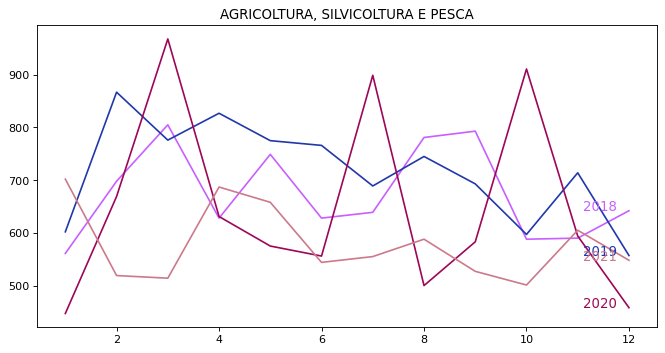

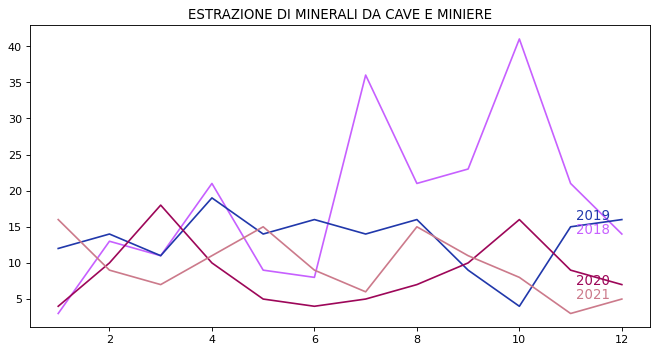

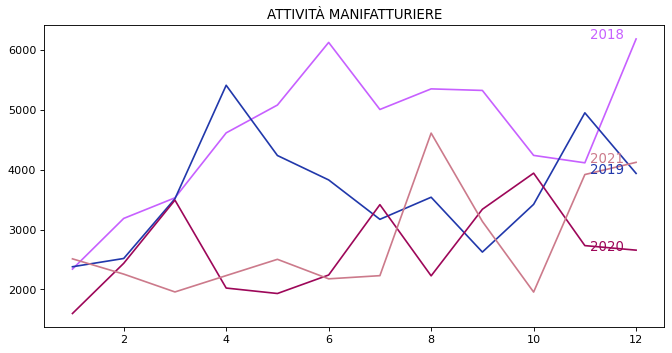

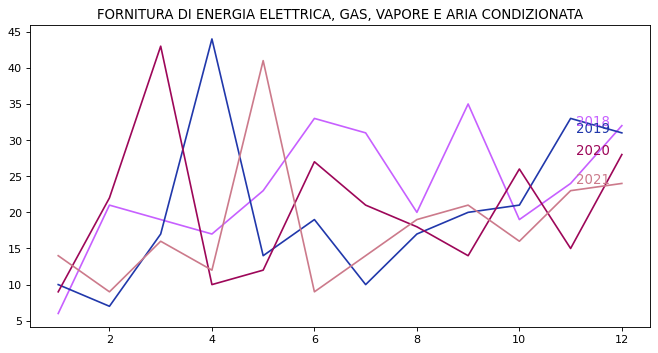

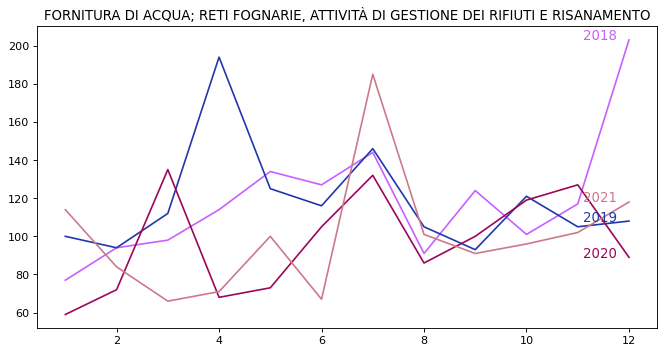

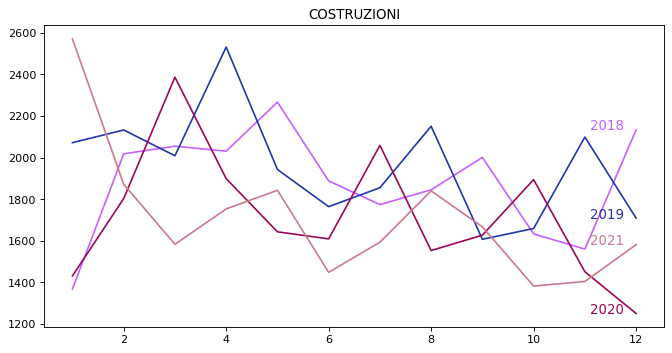

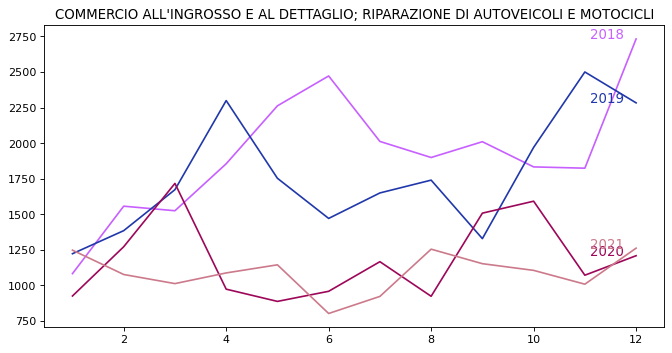

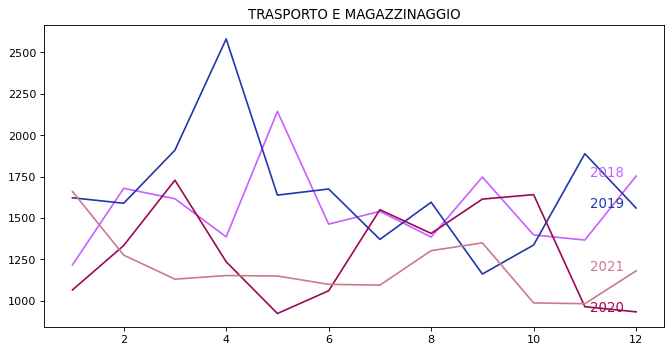

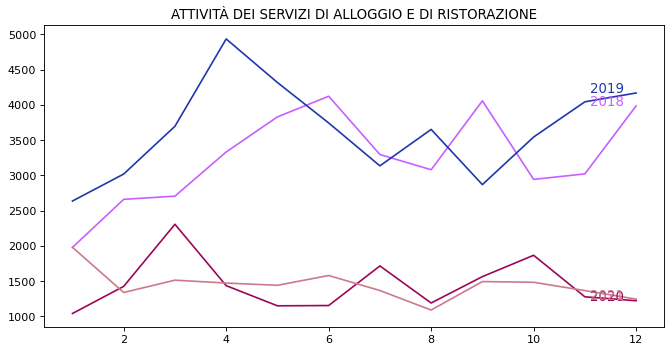

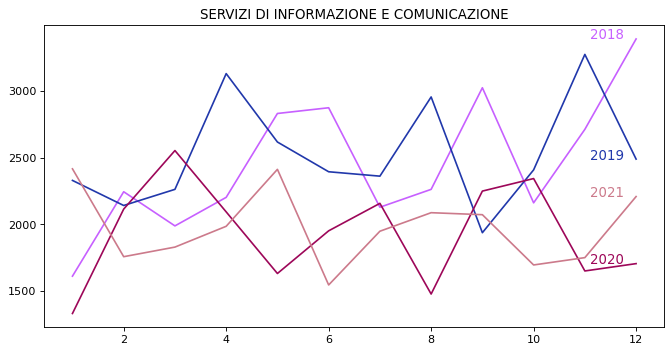

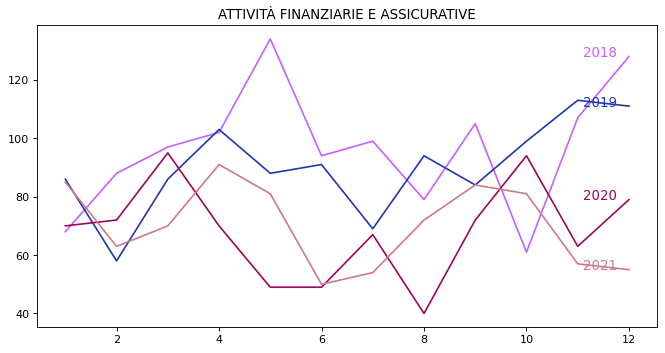

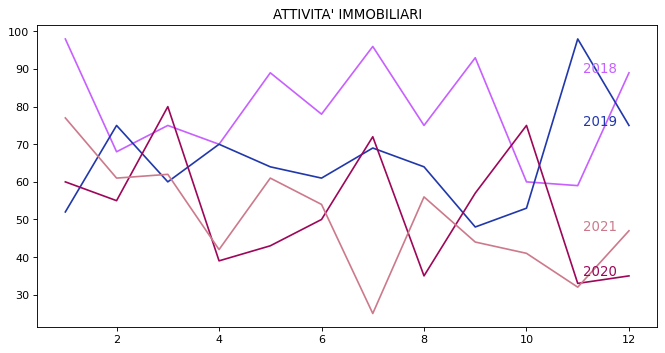

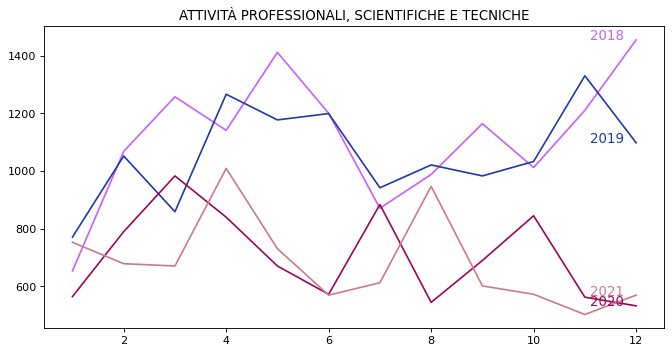

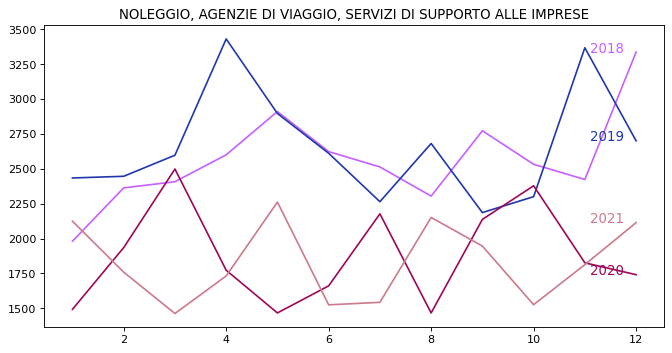

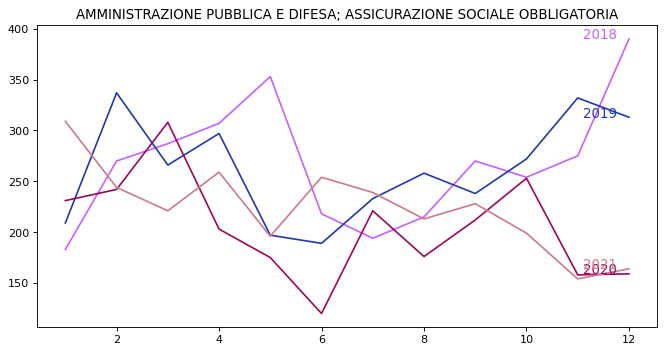

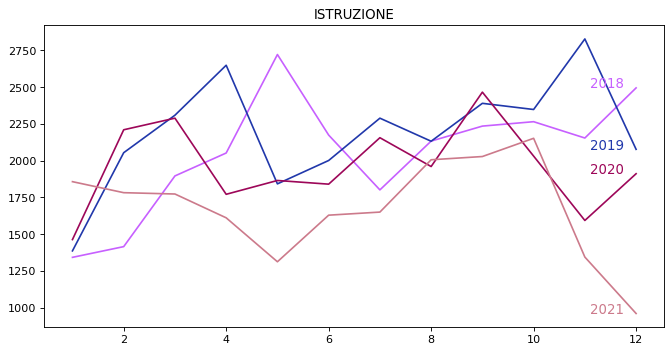

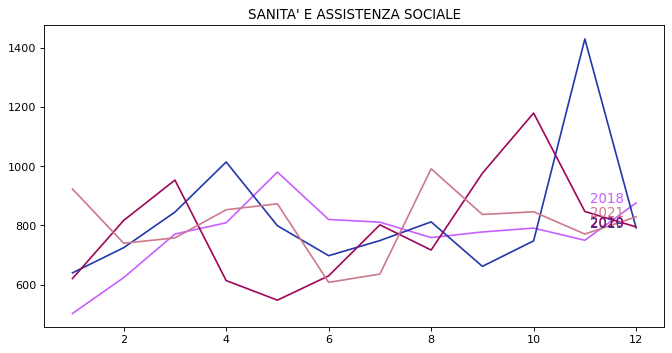

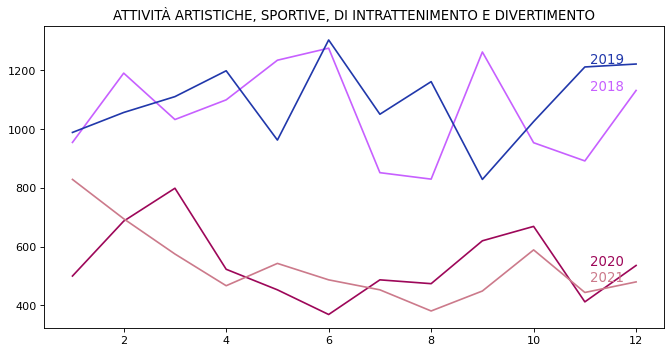

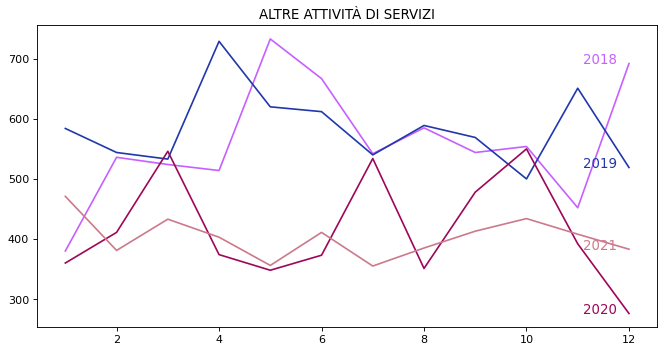

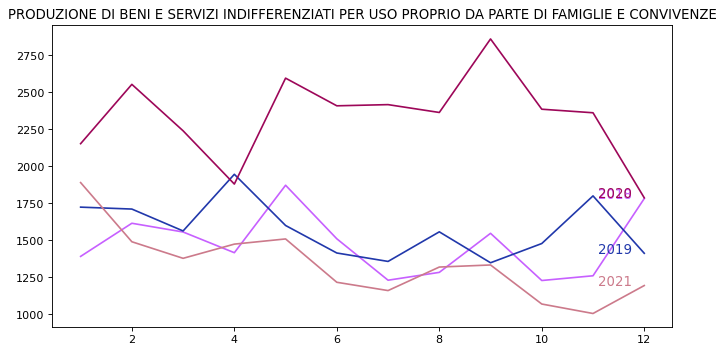

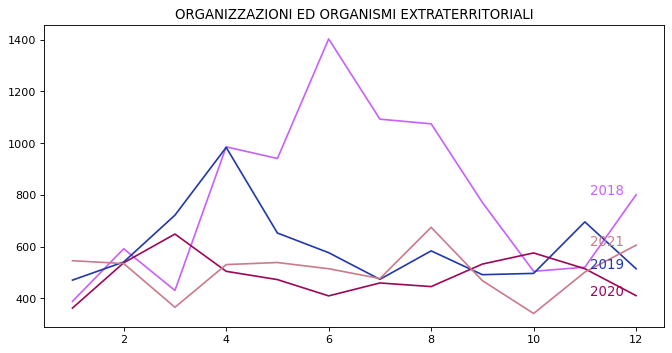

In [54]:
# Stampa i grafici relativi ai trend per i contratti attivati 
Plot_Trend(df_grouped_attivati)

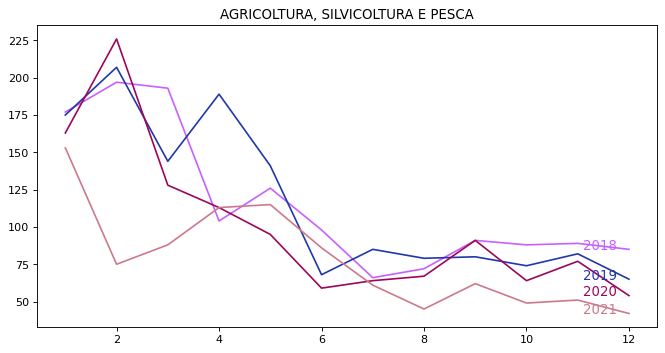

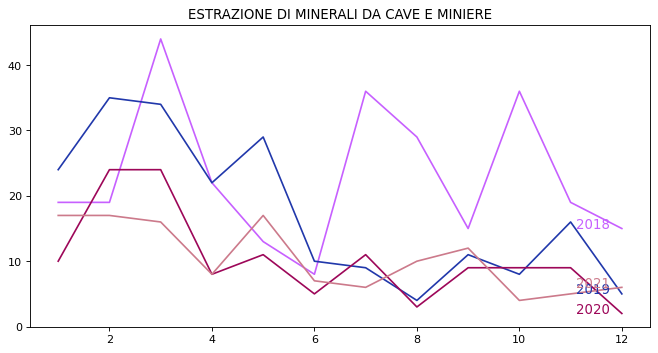

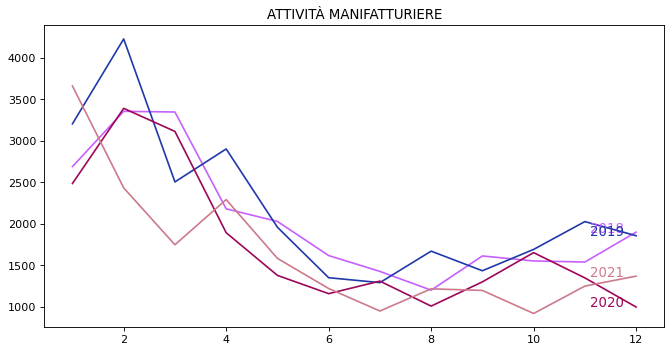

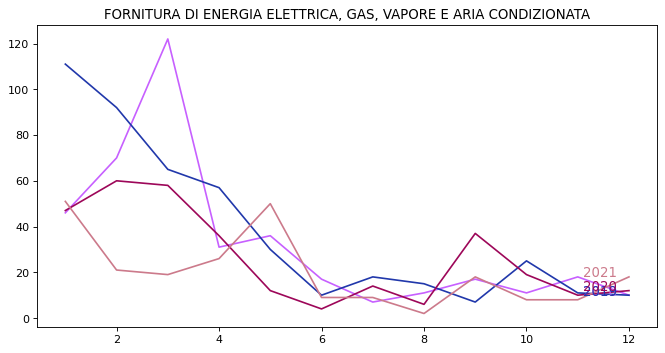

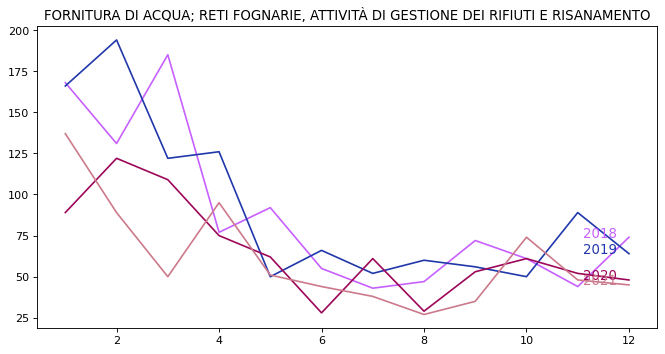

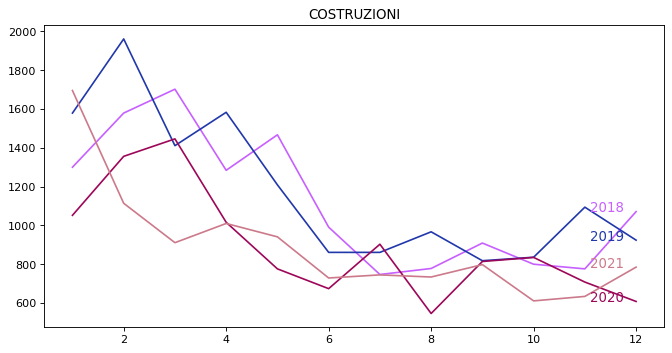

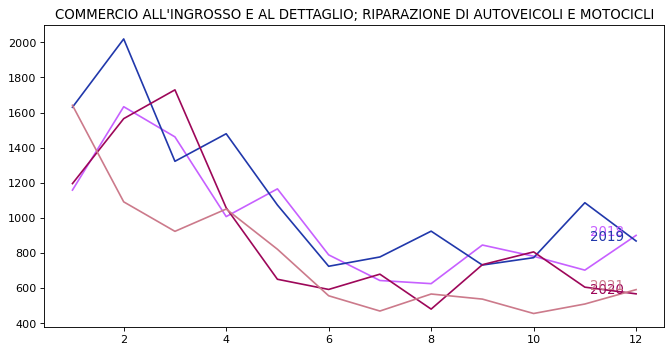

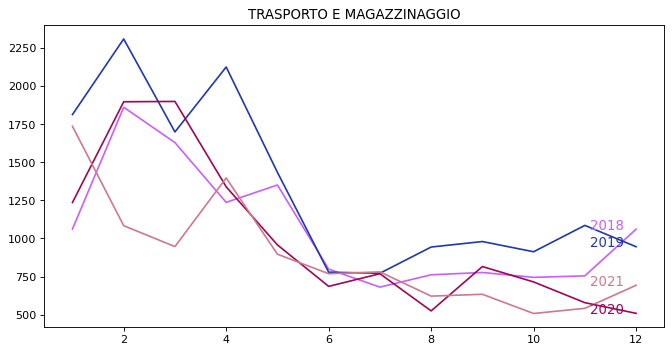

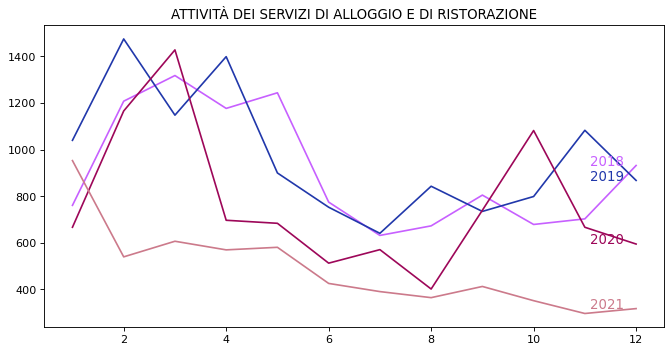

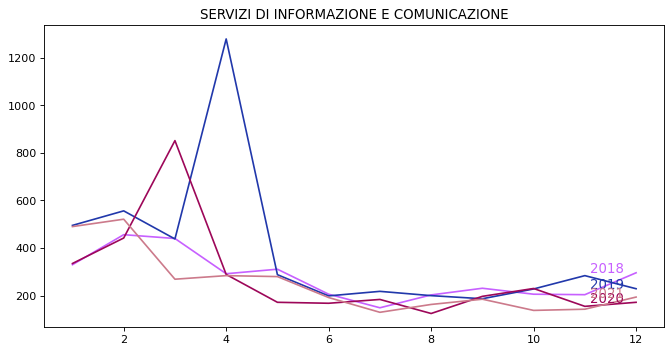

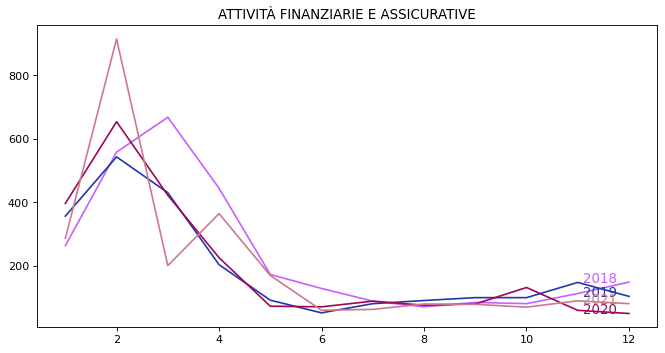

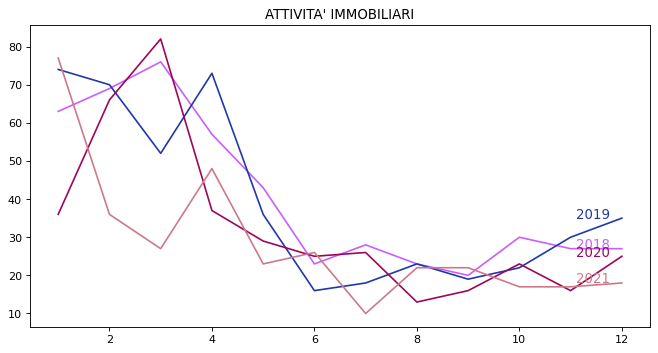

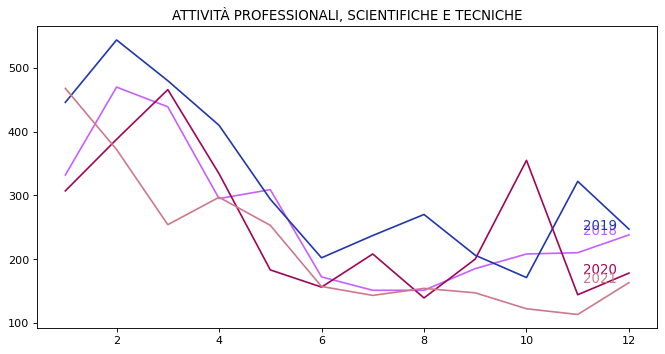

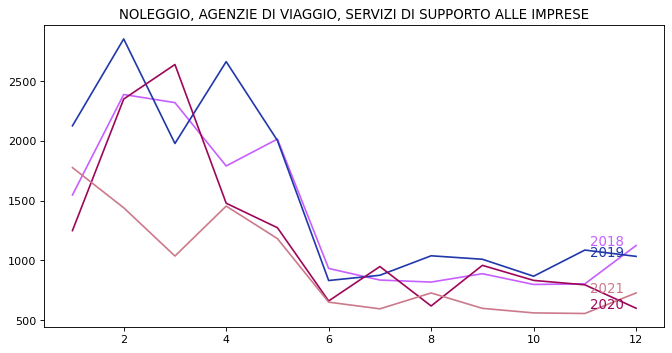

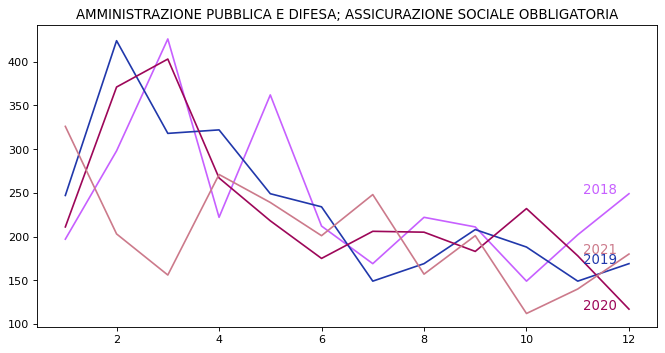

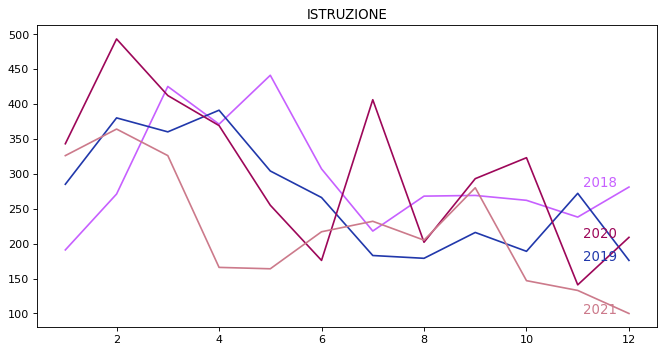

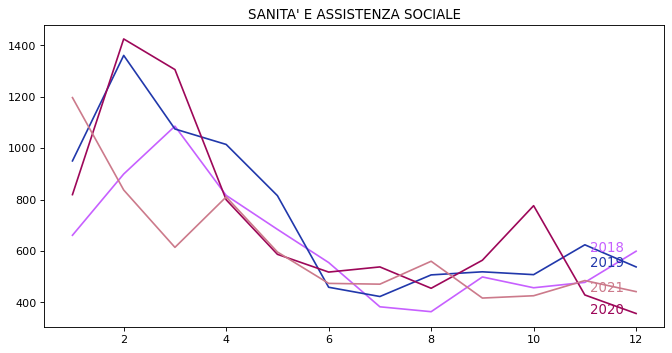

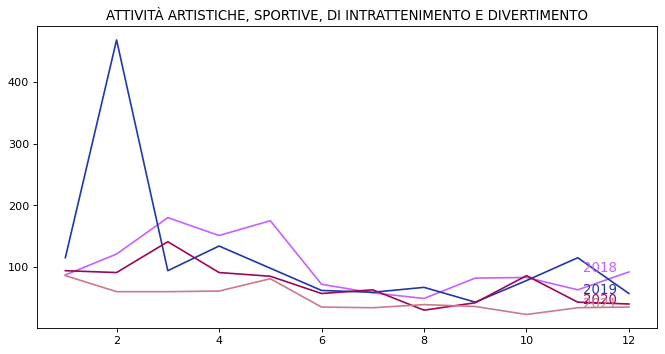

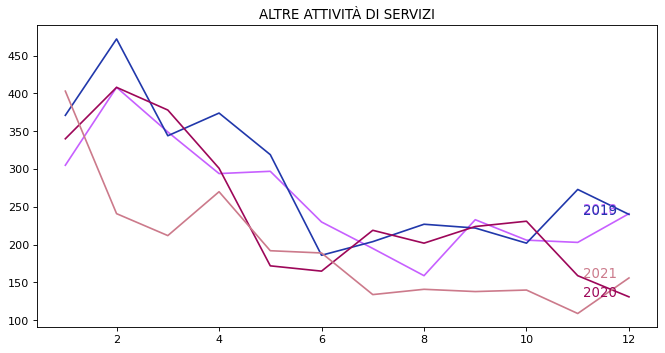

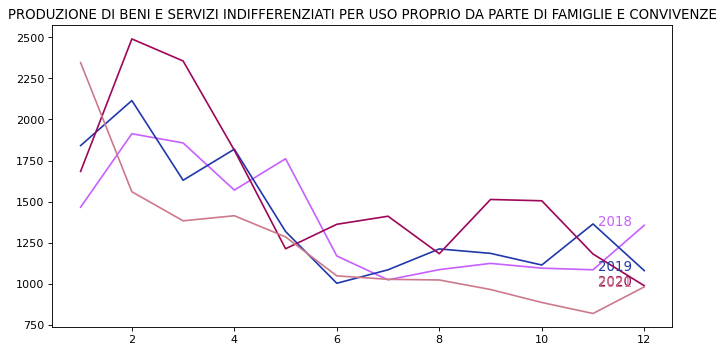

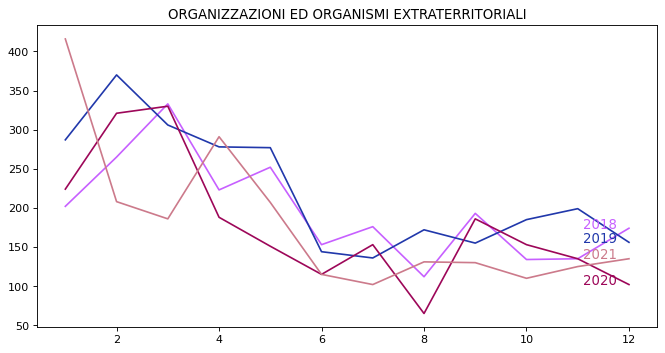

In [55]:
# Stampa i grafici relativi ai trend per i contratti terminati 
Plot_Trend(df_grouped_cessati)

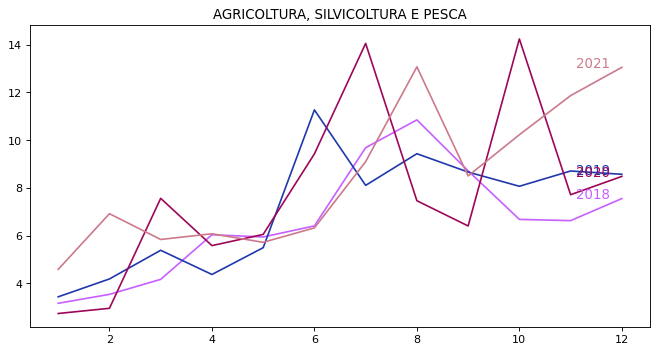

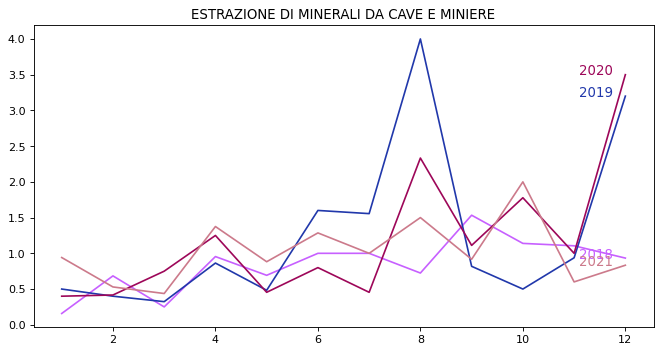

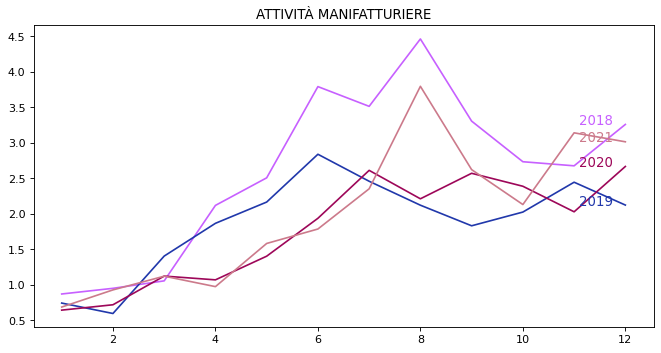

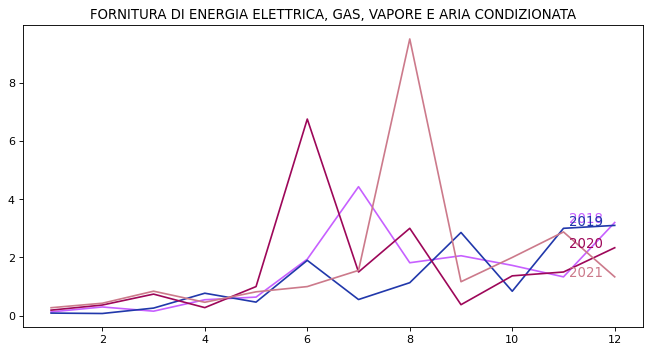

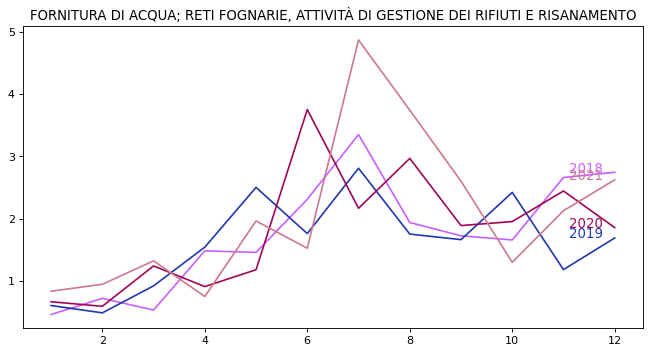

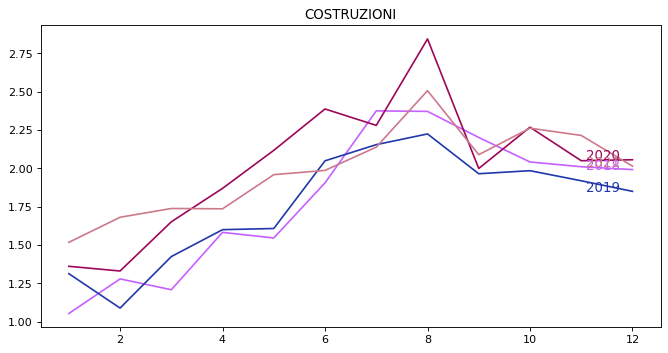

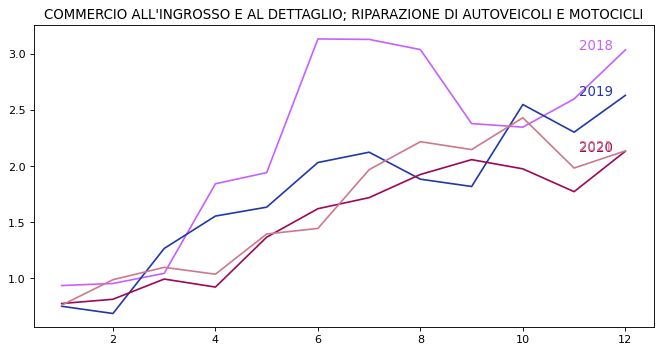

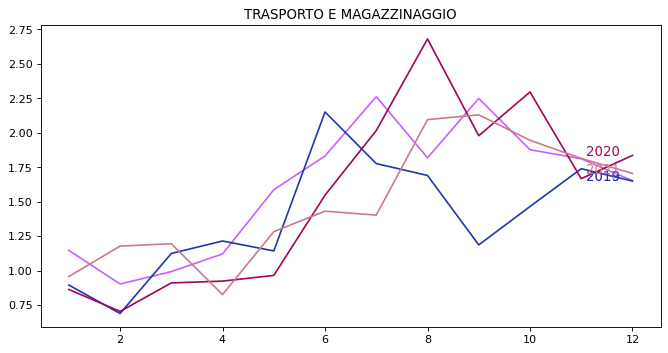

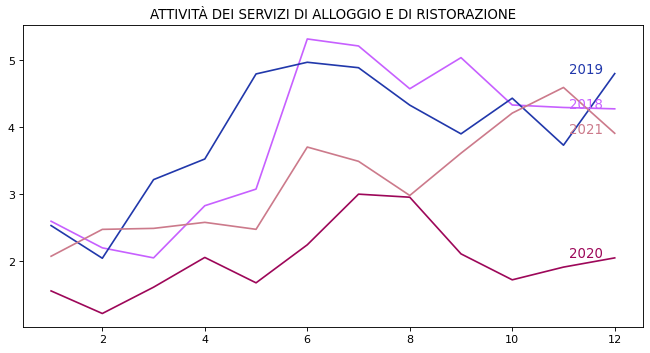

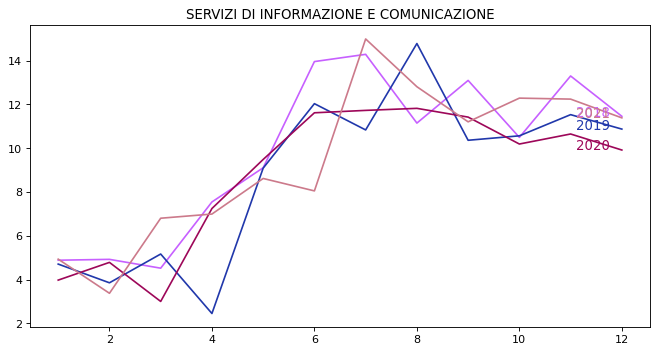

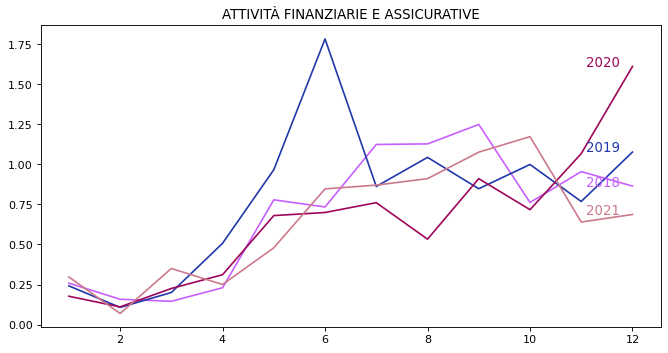

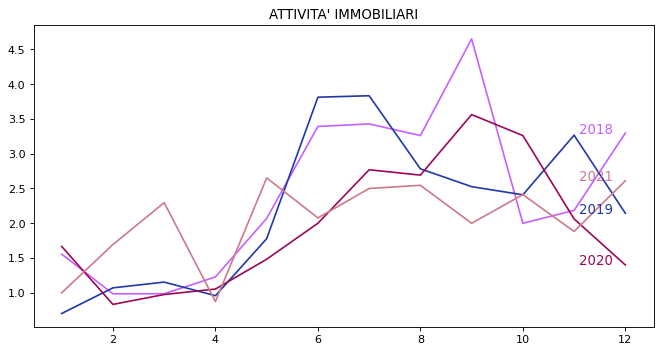

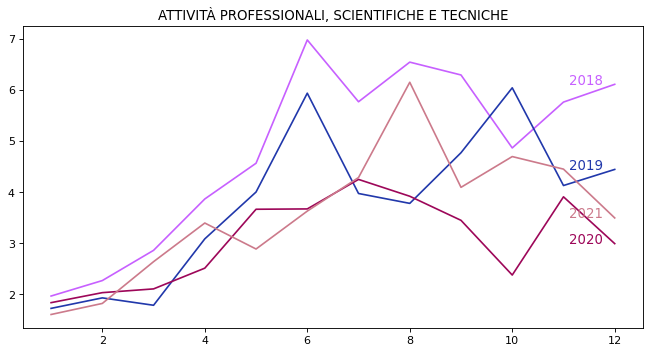

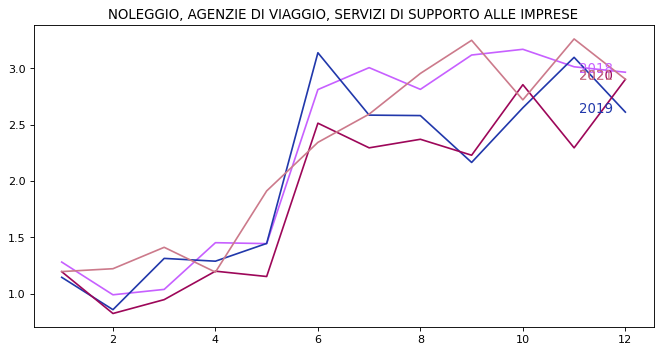

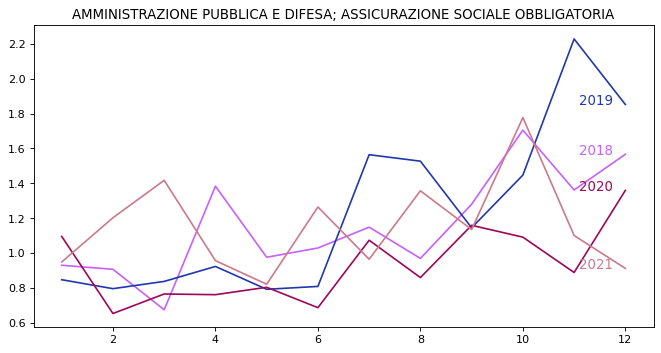

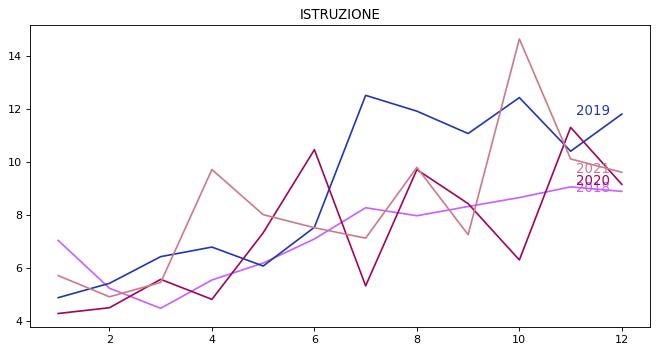

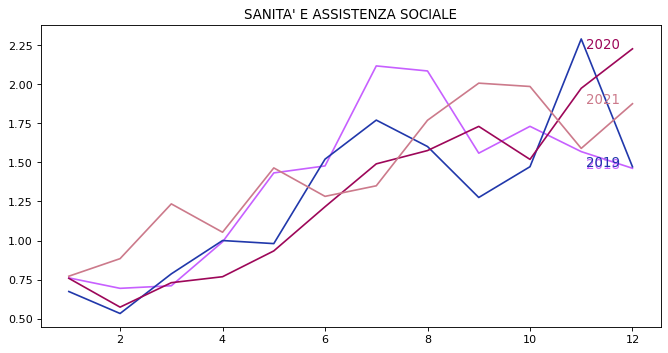

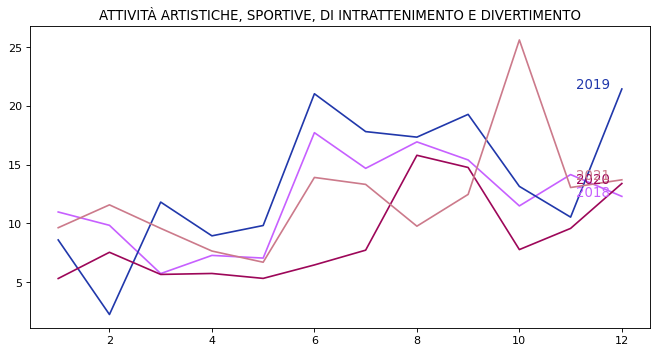

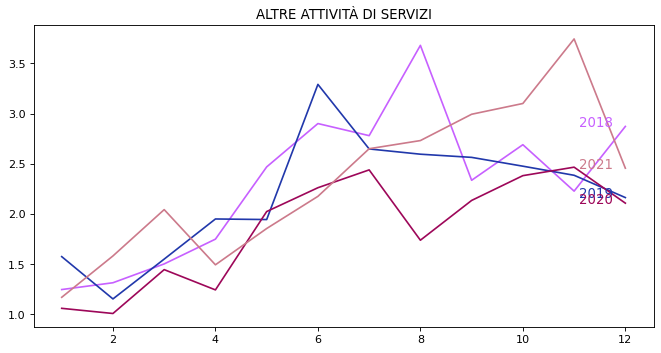

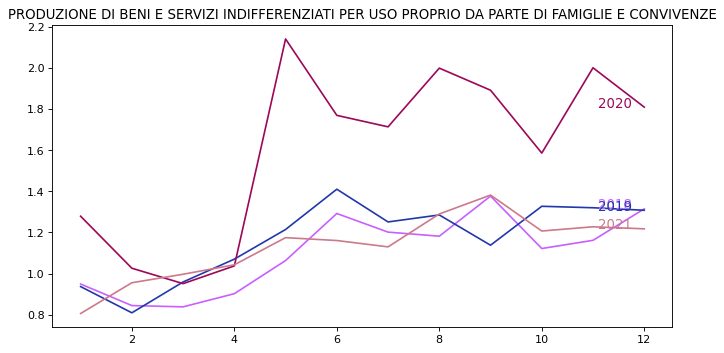

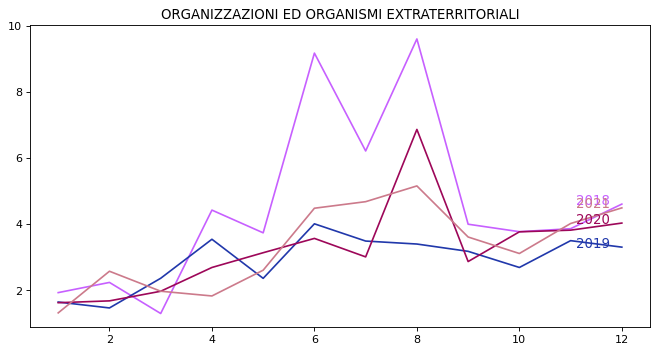

In [56]:
# Creazione di un dataset che permette di tenere in considerazione il rapporto tra
# Contratti attivati e contratti terminati
df_grouped_attivati.rename(columns={"VALUE":"VALUE_1"})
new_df = pd.merge(df_grouped_attivati, df_grouped_cessati,  how='left', left_on=['HYPER_CATEGORIA_ATECO','ANNO',"MESE"], right_on = ['HYPER_CATEGORIA_ATECO','ANNO',"MESE"])
new_df["VALUE"] = ""
new_df["VALUE"] = new_df["VALUE_x"] / new_df["VALUE_y"]
Plot_Trend(new_df)


In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

#### Considerano le informazioni ricavate dai grafici di cui sopra abbiamo deciso di andare a studiare le seguenti categorie:

###### 1: Servizi di Informazione e comunicazione
###### 2: Attività professionali scientifche e tecniche 
###### 3: Sanità

#### Le prime due in quanto essendo parte dei settori interessati vogliamo studiare il mercato futuro delle suddette. La categoria della Sanità invece potrebbe essere un settore interessante da studiare visti gli ultimi due anni di pandemia

In [58]:
# Creazione del DataSet relativo alle categorie scelte
new_df = new_df.loc[(new_df["HYPER_CATEGORIA_ATECO"]== "J") | (new_df["HYPER_CATEGORIA_ATECO"]== "M") | (new_df["HYPER_CATEGORIA_ATECO"]== "Q")]
new_df

HYPER_CATEGORIA_ATECO  ANNO  MESE  VALUE_x  VALUE_y     VALUE
540                      J  2017     1     1956      428  4.570093
541                      J  2017     2     1724      448  3.848214
542                      J  2017     3     2686      407  6.599509
543                      J  2017     4     1757      363  4.840220
544                      J  2017     5     2212      258  8.573643
...                    ...   ...   ...      ...      ...       ...
1015                     Q  2021     8      991      560  1.769643
1016                     Q  2021     9      837      417  2.007194
1017                     Q  2021    10      846      426  1.985915
1018                     Q  2021    11      771      485  1.589691
1019                     Q  2021    12      829      442  1.875566

[180 rows x 6 columns]

In [59]:
# Introduzione della colonna Data in quanto sarà necessaria nella prossima fase di analisi
new_df["DATA"] = ""
new_df["DATA"] = pd.to_datetime((new_df["ANNO"]*10000+new_df["MESE"]*100+1).apply(str),format='%Y%m%d')

In [60]:
# Impostazione dell'indice sulla colonna data
new_df.set_index("DATA")

HYPER_CATEGORIA_ATECO  ANNO  MESE  VALUE_x  VALUE_y     VALUE
DATA                                                                    
2017-01-01                     J  2017     1     1956      428  4.570093
2017-02-01                     J  2017     2     1724      448  3.848214
2017-03-01                     J  2017     3     2686      407  6.599509
2017-04-01                     J  2017     4     1757      363  4.840220
2017-05-01                     J  2017     5     2212      258  8.573643
...                          ...   ...   ...      ...      ...       ...
2021-08-01                     Q  2021     8      991      560  1.769643
2021-09-01                     Q  2021     9      837      417  2.007194
2021-10-01                     Q  2021    10      846      426  1.985915
2021-11-01                     Q  2021    11      771      485  1.589691
2021-12-01                     Q  2021    12      829      442  1.875566

[180 rows x 6 columns]

## Studio della Categoria "Servizi di informazione e comunicazione"

In [83]:
# Restituisce un DataSet filtrato per categoria, nella forma richiesta per lo studio seguente
def Prep_Dataset(df, parCat, parValueToBeRemoved):
    
    df_transformed  = df.drop(columns={"ANNO","MESE","VALUE",parValueToBeRemoved})
    df_transformed_cat = df_transformed.loc[df_transformed["HYPER_CATEGORIA_ATECO"] == parCat]
    df_transformed_cat.drop(columns={"HYPER_CATEGORIA_ATECO"},inplace=True)
    df_transformed_cat.set_index("DATA",inplace=True)
    
    return df_transformed_cat

In [109]:
# Funzione che permette di plottare le componenti della seasonality
# Questo ci permette di capire con quale tipo di time series abbiamo a che fare
def Studio_Seasonality(df,parPeriod,parTrendType):
    
    # Multiplicative Decomposition
    result_mul = seasonal_decompose(df[parTrendType], model='multiplicative', extrapolate_trend='freq', period = parPeriod)
    # Additive Decomposition
    result_add = seasonal_decompose(df[parTrendType], model='additive', extrapolate_trend='freq', period = parPeriod)
    plt.rcParams.update({'figure.figsize': (10,10)})
    result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
    result_add.plot().suptitle('Additive Decompose', fontsize=22)
    
    return plt

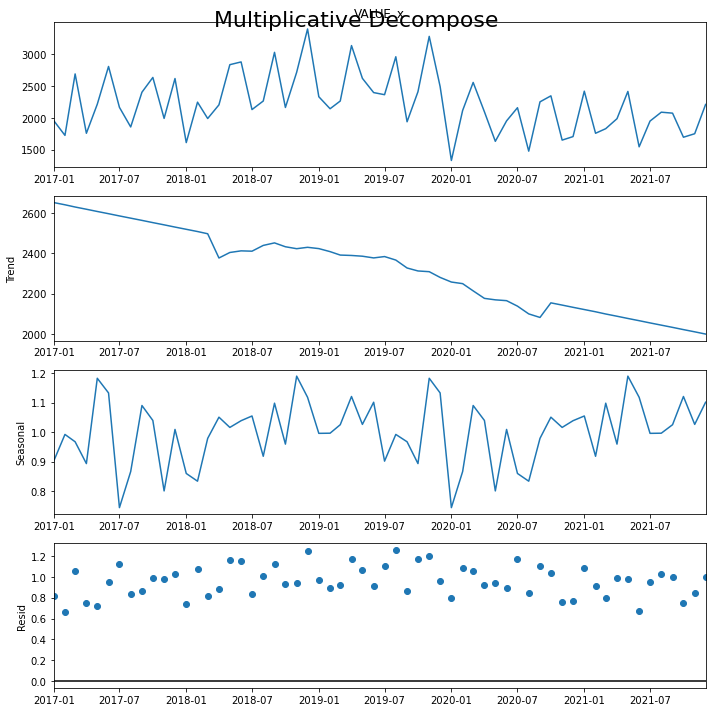

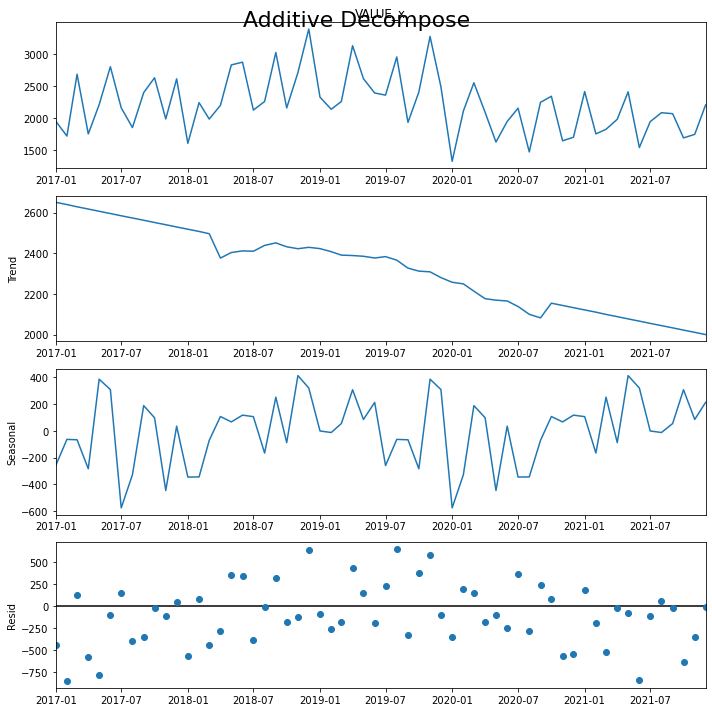

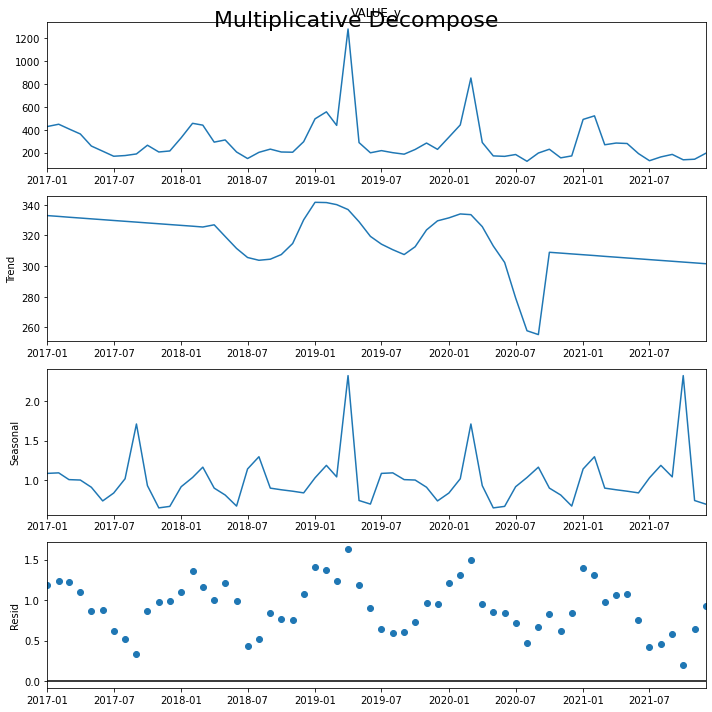

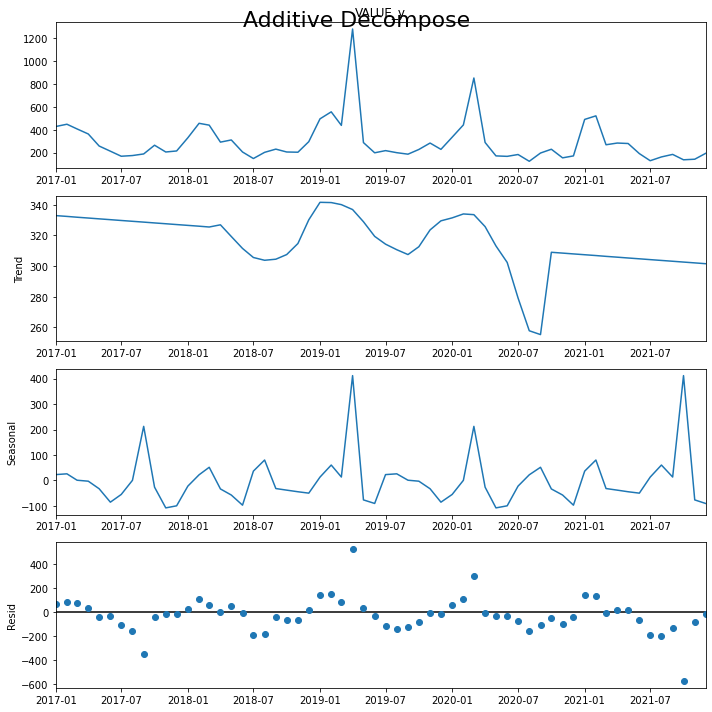

In [112]:
# Studio Seasonality per Assunzioni
df_Ser_Inf_Com = Prep_Dataset(new_df,"J","VALUE_y")
plt1 = Studio_Seasonality(df_Ser_Inf_Com,30,"VALUE_x")

# Studio Seasonality per Licenziamenti
df_Ser_Inf_Com = Prep_Dataset(new_df,"J","VALUE_x")
plt2 = Studio_Seasonality(df_Ser_Inf_Com,30,"VALUE_y")

### Studio della Categoria "Attività professionali scientifche e tecniche"

<module 'matplotlib.pyplot' from '/Users/mac-josh/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

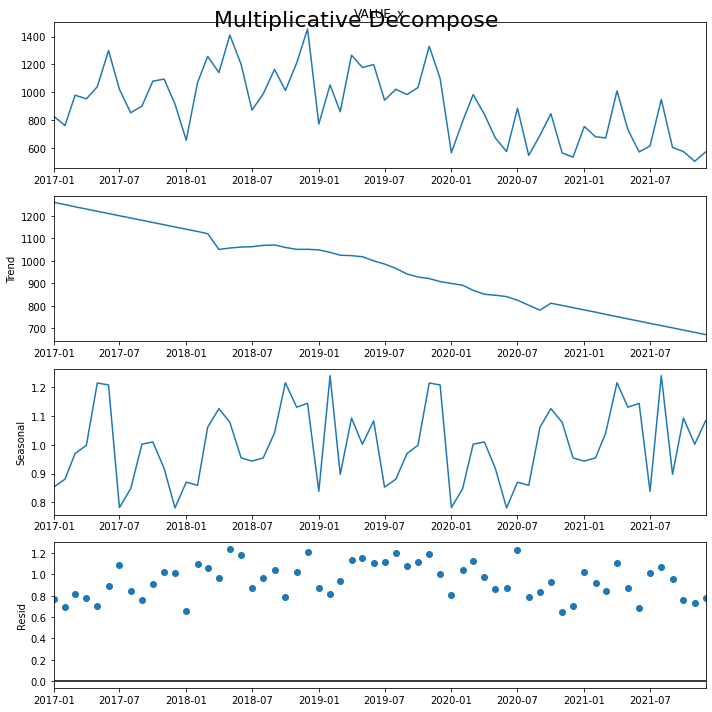

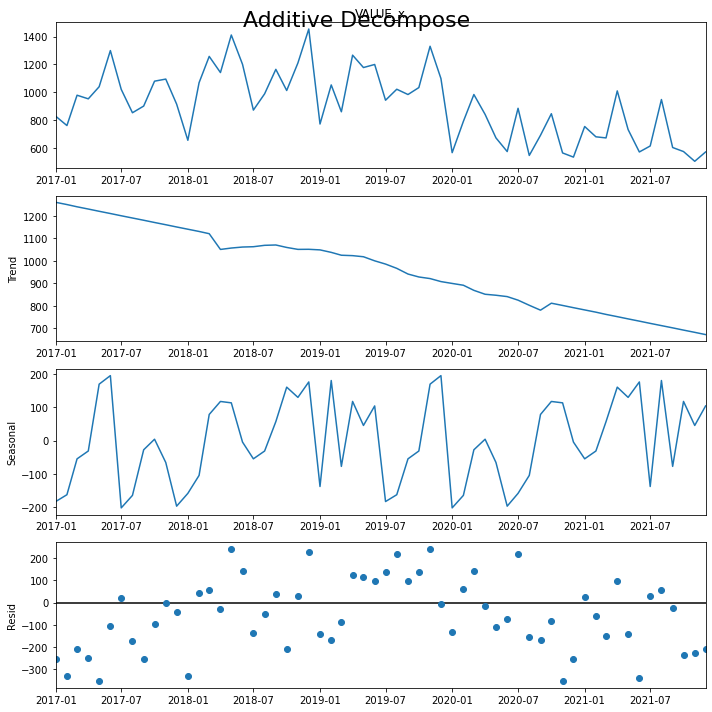

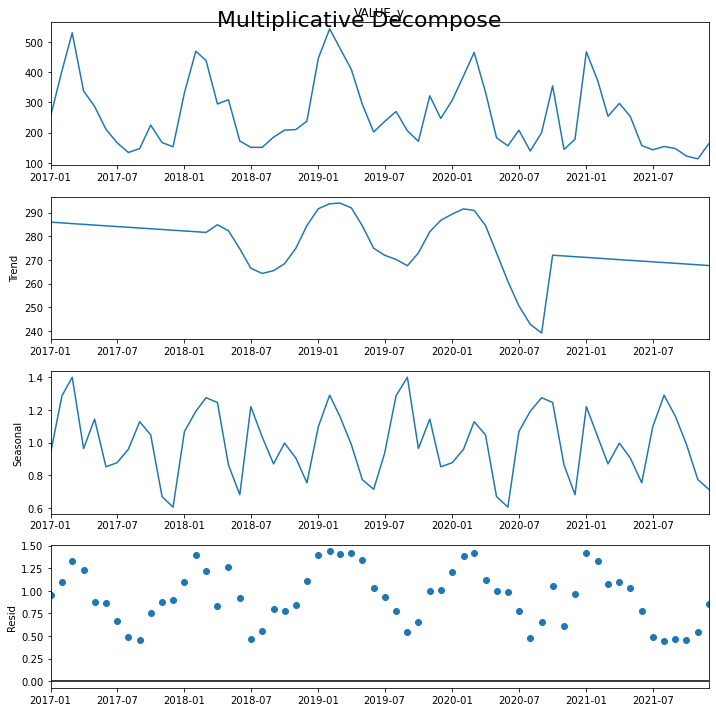

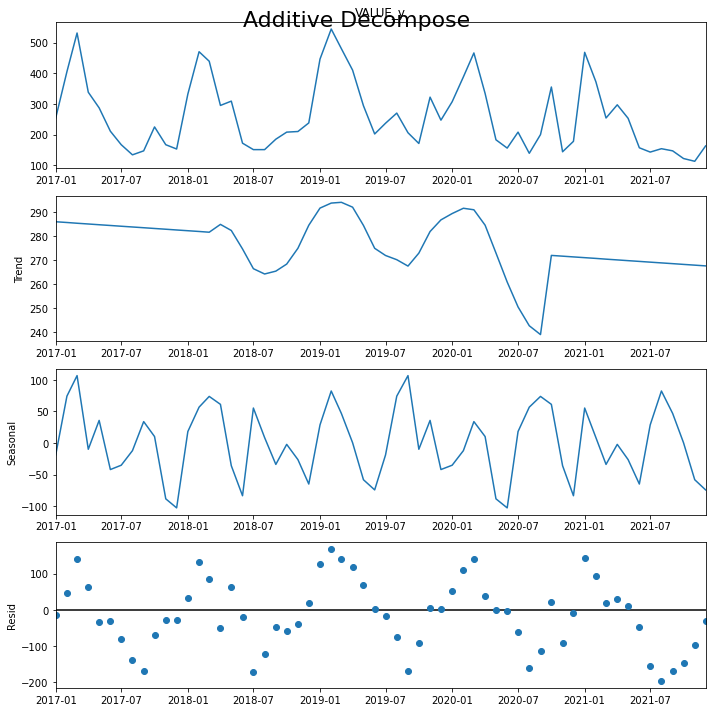

In [113]:
# Assunzioni
df_Att_Pro_Tec = Prep_Dataset(new_df,"M","VALUE_y")
Studio_Seasonality(df_Att_Pro_Tec,30,"VALUE_x")

# Licenziamenti
df_Att_Pro_Tec = Prep_Dataset(new_df,"M","VALUE_x")
Studio_Seasonality(df_Att_Pro_Tec,30,"VALUE_y")

### Studio della Categoria "Sanità"

<module 'matplotlib.pyplot' from '/Users/mac-josh/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

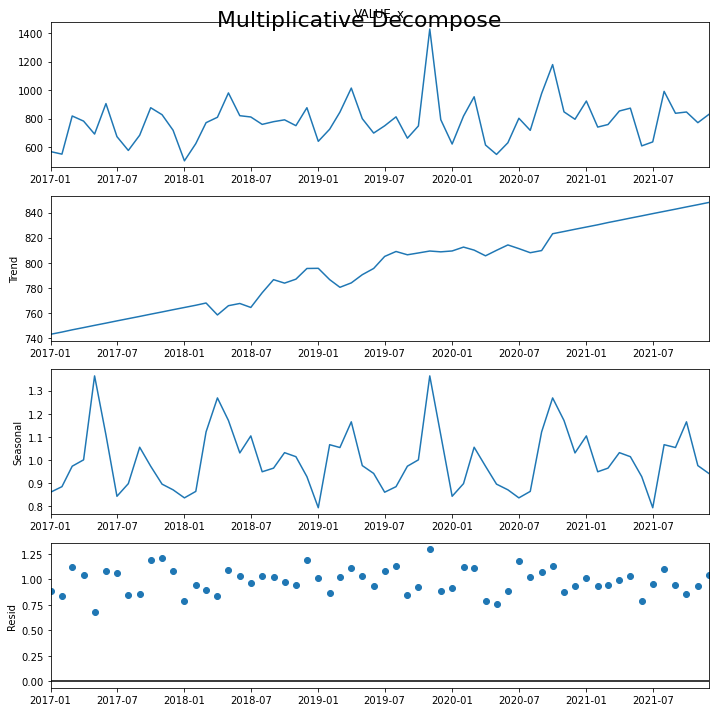

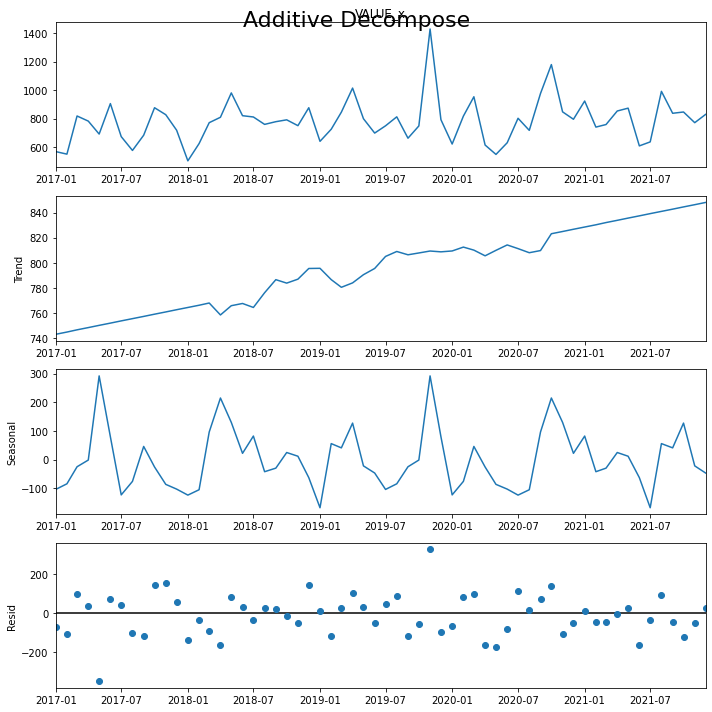

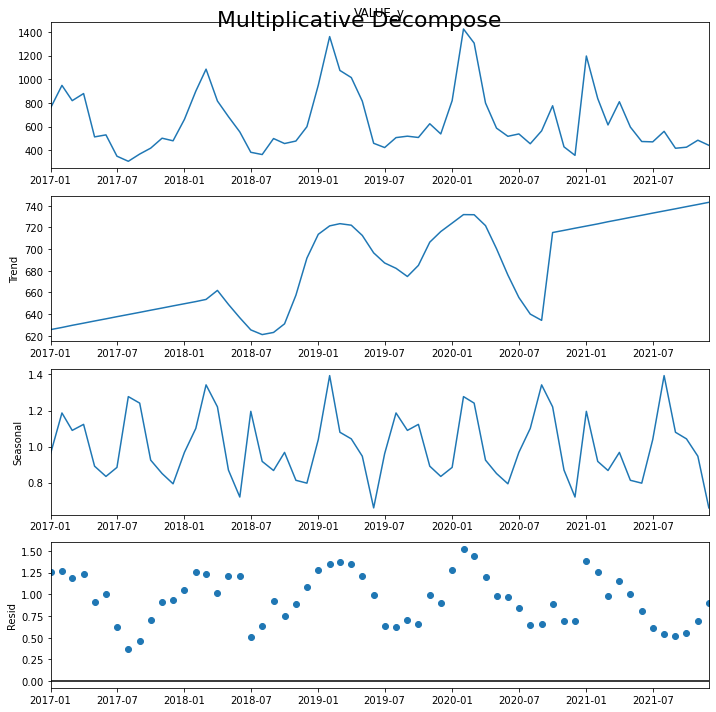

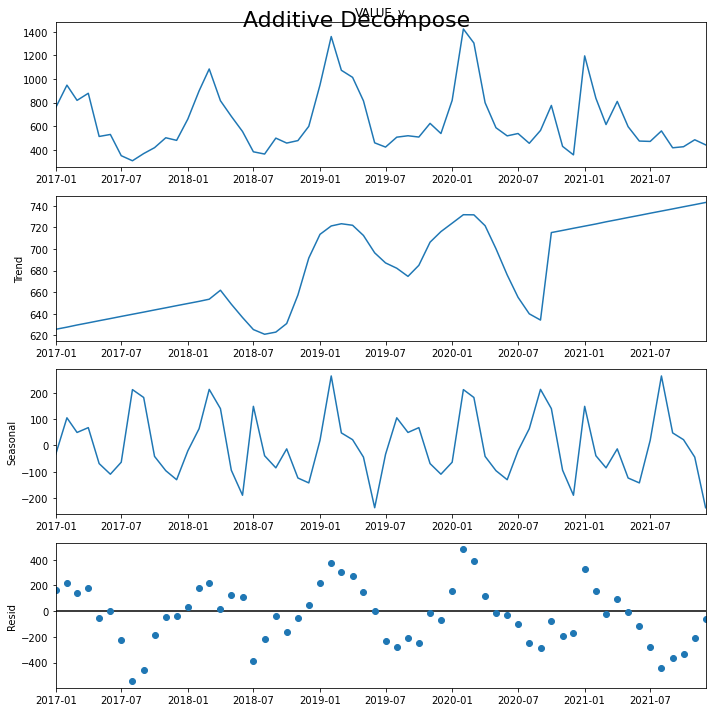

In [114]:
# Assunzioni 
df_San = Prep_Dataset(new_df,"Q","VALUE_y")
Studio_Seasonality(df_San,30,"VALUE_x")

# Licenziamenti
df_San = Prep_Dataset(new_df,"Q","VALUE_x")
Studio_Seasonality(df_San,30,"VALUE_y")